## Ejemplo de Prueba de Hipótesis para la Media

Vamos a realizar una prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es desconocida. En este caso, utilizaremos la distribución t de Student.

**Escenario:** Una empresa afirma que el peso promedio de sus paquetes es de 10 kg. Un inspector toma una muestra de 25 paquetes y encuentra que el peso promedio de la muestra es de 9.5 kg con una desviación estándar muestral de 1.8 kg. Con un nivel de significancia de α = 0.05, ¿hay suficiente evidencia para refutar la afirmación de la empresa?

### 1. Definir las hipótesis nula y alternativa.

*   **Hipótesis Nula (H₀):** El peso promedio de los paquetes es igual a 10 kg (μ = 10).
*   **Hipótesis Alternativa (H₁):** El peso promedio de los paquetes es diferente de 10 kg (μ ≠ 10).

Esta es una prueba de hipótesis bilateral (de dos colas).

### 2. Establecer el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identificar el estadístico de prueba y su distribución.

Dado que la desviación estándar poblacional es desconocida y el tamaño de la muestra es menor a 30 (n=25), utilizaremos el estadístico de prueba t de Student. La distribución asociada es la distribución t de Student con n - 1 grados de libertad.

Fórmula del estadístico t:
$$ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

### 4. Determinar el valor crítico y la región de rechazo.

Para una prueba bilateral con α = 0.05 y n - 1 = 25 - 1 = 24 grados de libertad, necesitamos encontrar los valores críticos t que dejan α/2 = 0.025 en cada cola de la distribución t.

In [3]:
# Parámetros del problema
mu_0 = 10       # Media poblacional hipotetizada (H0)
x_bar = 9.5     # Media muestral
s = 1.8         # Desviación estándar muestral
n = 25          # Tamaño de la muestra
alpha = 0.05    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular los valores críticos t para una prueba bilateral
t_critical_left = stats.t.ppf(alpha / 2, df)
t_critical_right = stats.t.ppf(1 - alpha / 2, df)

print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t (cola inferior): {t_critical_left:.4f}")
print(f"Valor crítico t (cola superior): {t_critical_right:.4f}")

# La región de rechazo son los valores de t calculados que son menores que t_critical_left o mayores que t_critical_right.

Grados de libertad (df): 24
Valor crítico t (cola inferior): -2.0639
Valor crítico t (cola superior): 2.0639


In [2]:
# Importar las librerías necesarias para cálculos estadísticos y gráficos.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # Aunque no se usará en todos los ejemplos, es útil tener pandas para manejo de datos.

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


### 5. Calcular el estadístico de prueba y el valor p.

Utilizaremos la fórmula del estadístico t y la función `stats.ttest_1samp` de `scipy.stats` para calcular el estadístico de prueba y el valor p.

In [4]:
# Calcular el estadístico de prueba t
t_statistic = (x_bar - mu_0) / (s / np.sqrt(n))

# Calcular el valor p (prueba bilateral)
# La función ttest_1samp realiza una prueba t de una muestra.
# Le pasamos una muestra ficticia que represente la media muestral, el valor hipotetizado de la media poblacional, y utilizamos la desviación estándar muestral.
# Nota: stats.ttest_1samp(a, popmean) calcula el estadístico t y el p-valor para la hipótesis de que la media de la muestra 'a' es igual a 'popmean'.
# En nuestro caso, no tenemos los datos crudos, solo la media muestral y la desviación estándar muestral.
# Podemos calcular el p-valor directamente desde el estadístico t usando la distribución t.

# El p-valor para una prueba bilateral es 2 * P(T > |t_statistic|)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print(f"Estadístico de prueba t calculado: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba t calculado: -1.3889
Valor p: 0.1776


### 6. Graficar la distribución t, la región de rechazo, el valor crítico y el estadístico calculado.

Visualizaremos la distribución t de Student con los grados de libertad correspondientes, marcando las regiones de rechazo, los valores críticos y la posición del estadístico de prueba calculado.

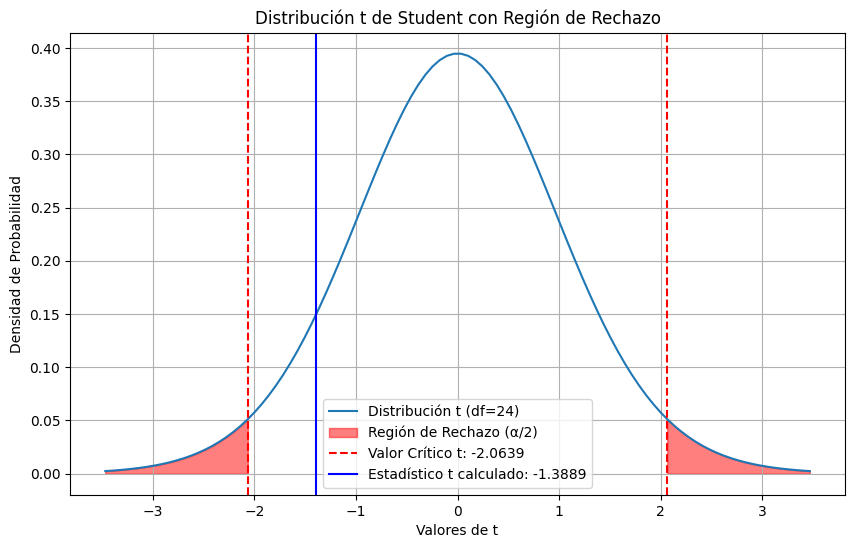

In [5]:
# Generar valores para el eje x de la distribución t
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución t
pdf = stats.t.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución t (df={df})')

# Rellenar la región de rechazo (cola inferior)
x_reject_left = np.linspace(stats.t.ppf(0.001, df), t_critical_left, 100)
plt.fill_between(x_reject_left, 0, stats.t.pdf(x_reject_left, df), color='red', alpha=0.5, label='Región de Rechazo (α/2)')

# Rellenar la región de rechazo (cola superior)
x_reject_right = np.linspace(t_critical_right, stats.t.ppf(0.999, df), 100)
plt.fill_between(x_reject_right, 0, stats.t.pdf(x_reject_right, df), color='red', alpha=0.5)

# Dibujar los valores críticos
plt.axvline(t_critical_left, color='red', linestyle='--', label=f'Valor Crítico t: {t_critical_left:.4f}')
plt.axvline(t_critical_right, color='red', linestyle='--')

# Dibujar el estadístico de prueba calculado
plt.axvline(t_statistic, color='blue', linestyle='-', label=f'Estadístico t calculado: {t_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución t de Student con Región de Rechazo')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tomar una decisión estadística y concluir en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba t calculado con los valores críticos, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con los valores críticos:** El estadístico de prueba calculado es {t_statistic:.4f}. Los valores críticos para α = 0.05 son {t_critical_left:.4f} y {t_critical_right:.4f}. Dado que el estadístico de prueba ({t_statistic:.4f}) no cae en la región de rechazo (es decir, {t_critical_left:.4f} < {t_statistic:.4f} < {t_critical_right:.4f}), no rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es mayor que α (0.05), no rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, no hay suficiente evidencia estadística para refutar la afirmación de la empresa de que el peso promedio de sus paquetes es de 10 kg.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({t_statistic:.4f}), asumiendo que la hipótesis nula (μ = 10) es verdadera. Un valor p alto (mayor que α) indica que los datos observados son razonablemente probables bajo la hipótesis nula, por lo que no tenemos suficiente evidencia para rechazarla. En este caso, si el peso promedio real fuera 10 kg, habría un {p_value:.2%} de probabilidad de obtener una media muestral de 9.5 kg o algo más alejado de 10 kg, simplemente por casualidad de muestreo.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Conocida)

Vamos a construir un intervalo de confianza para la media poblacional ($\mu$) cuando conocemos la desviación estándar poblacional ($\sigma$). En este caso, utilizaremos la distribución normal estándar (Z).

**Escenario:** Se desea estimar la altura promedio de estudiantes universitarios. En una muestra de 50 estudiantes, se obtuvo una media de 170 cm. Se sabe que la desviación estándar poblacional es de 10 cm. Construye un intervalo de confianza del 95 % para la media poblacional.

### Explicación del Intervalo de Confianza

Un intervalo de confianza es un rango de valores dentro del cual es probable que se encuentre un parámetro poblacional desconocido (como la media poblacional) con un cierto nivel de confianza. El nivel de confianza (en este caso, 95%) indica la proporción de veces que, si repitiéramos el proceso de muestreo y construcción del intervalo muchas veces, el intervalo contendría el verdadero parámetro poblacional.

La fórmula general para un intervalo de confianza para la media con desviación estándar poblacional conocida es:

$$ \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para un nivel de significancia α.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

In [9]:
# Parámetros del problema
x_bar = 170  # Media muestral
sigma = 10   # Desviación estándar poblacional
n = 50       # Tamaño de la muestra
nivel_confianza = 0.95 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza

# Valor crítico Z para un intervalo de confianza bilateral del 95%
# stats.norm.ppf(1 - alpha/2) nos da el valor Z tal que el área a su izquierda es 1 - alpha/2
z_critical = stats.norm.ppf(1 - alpha / 2)

# Margen de error
margen_error = z_critical * (sigma / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Valor crítico Z: {z_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.95
Nivel de significancia (alpha): 0.05
Valor crítico Z: 1.9600
Margen de error: 2.7718
Intervalo de confianza del 95.0% para la media poblacional: (167.2282, 172.7718)


### Interpretación del Intervalo de Confianza

Con un 95% de confianza, estimamos que la verdadera altura promedio de todos los estudiantes universitarios se encuentra entre {intervalo_inferior:.4f} cm y {intervalo_superior:.4f} cm. Esto no significa que hay un 95% de probabilidad de que la media poblacional esté dentro de este intervalo específico, sino que si repitiéramos este proceso muchas veces, el 95% de los intervalos construidos de esta manera contendrían la verdadera media poblacional.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Conocida) - Segundo Caso

Vamos a construir otro intervalo de confianza para la media poblacional ($\mu$) cuando conocemos la desviación estándar poblacional ($\sigma$).

**Escenario:** Un examen nacional tiene una desviación estándar histórica de 15 puntos. En una muestra aleatoria de 100 estudiantes, la calificación promedio fue de 75 puntos. Determina un intervalo de confianza del 90 % para la media poblacional.

### Explicación del Intervalo de Confianza y Fórmula

Recordemos que la fórmula para un intervalo de confianza para la media con desviación estándar poblacional conocida es:

$$ \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para un nivel de significancia α.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

In [11]:
# Parámetros del problema
x_bar = 75   # Media muestral
sigma = 15   # Desviación estándar poblacional
n = 100      # Tamaño de la muestra
nivel_confianza = 0.90 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza

# Valor crítico Z para un intervalo de confianza bilateral del 90%
# stats.norm.ppf(1 - alpha/2) nos da el valor Z tal que el área a su izquierda es 1 - alpha/2
z_critical = stats.norm.ppf(1 - alpha / 2)

# Margen de error
margen_error = z_critical * (sigma / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Valor crítico Z: {z_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.9
Nivel de significancia (alpha): 0.10
Valor crítico Z: 1.6449
Margen de error: 2.4673
Intervalo de confianza del 90.0% para la media poblacional: (72.5327, 77.4673)


### Interpretación del Intervalo de Confianza

Con un 90% de confianza, estimamos que la verdadera calificación promedio de todos los estudiantes en el examen nacional se encuentra entre {intervalo_inferior:.4f} puntos y {intervalo_superior:.4f} puntos.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Conocida) - Tercer Caso

Vamos a construir otro intervalo de confianza para la media poblacional ($\mu$) cuando conocemos la desviación estándar poblacional ($\sigma$), esta vez con un nivel de confianza del 99%.

**Escenario:** Una fábrica produce tornillos con una desviación estándar de 0.2 cm. En una inspección de calidad, se midieron 30 tornillos y se obtuvo un diámetro promedio de 2.5 cm. Calcula un intervalo de confianza del 99 % para el diámetro promedio real.

### Explicación del Intervalo de Confianza y Fórmula

Como recordatorio, la fórmula para un intervalo de confianza para la media con desviación estándar poblacional conocida es:

$$ \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para un nivel de significancia α.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

In [12]:
# Parámetros del problema
x_bar = 2.5  # Media muestral
sigma = 0.2  # Desviación estándar poblacional
n = 30       # Tamaño de la muestra
nivel_confianza = 0.99 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza

# Valor crítico Z para un intervalo de confianza bilateral del 99%
# stats.norm.ppf(1 - alpha/2) nos da el valor Z tal que el área a su izquierda es 1 - alpha/2
z_critical = stats.norm.ppf(1 - alpha / 2)

# Margen de error
margen_error = z_critical * (sigma / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Valor crítico Z: {z_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.99
Nivel de significancia (alpha): 0.01
Valor crítico Z: 2.5758
Margen de error: 0.0941
Intervalo de confianza del 99.0% para la media poblacional: (2.4059, 2.5941)


### Interpretación del Intervalo de Confianza

Con un 99% de confianza, estimamos que el verdadero diámetro promedio de los tornillos producidos por la fábrica se encuentra entre {intervalo_inferior:.4f} cm y {intervalo_superior:.4f} cm.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Conocida) - Cuarto Caso

Continuamos con la construcción de un intervalo de confianza para la media poblacional ($\mu$) cuando conocemos la desviación estándar poblacional ($\sigma$).

**Escenario:** Un fabricante afirma que sus baterías tienen una desviación estándar de 1.5 horas. En una prueba con 25 baterías, la duración promedio fue de 12 horas. Encuentra un intervalo de confianza del 95 % para la duración media poblacional.

### Explicación del Intervalo de Confianza y Fórmula

La fórmula para un intervalo de confianza para la media con desviación estándar poblacional conocida es:

$$ \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para un nivel de significancia α.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

In [13]:
# Parámetros del problema
x_bar = 12   # Media muestral
sigma = 1.5  # Desviación estándar poblacional (asumida como poblacional según el enunciado)
n = 25       # Tamaño de la muestra
nivel_confianza = 0.95 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza

# Valor crítico Z para un intervalo de confianza bilateral del 95%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Margen de error
margen_error = z_critical * (sigma / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Valor crítico Z: {z_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.95
Nivel de significancia (alpha): 0.05
Valor crítico Z: 1.9600
Margen de error: 0.5880
Intervalo de confianza del 95.0% para la media poblacional: (11.4120, 12.5880)


### Interpretación del Intervalo de Confianza

Con un 95% de confianza, estimamos que la verdadera duración promedio de las baterías producidas por el fabricante se encuentra entre {intervalo_inferior:.4f} horas y {intervalo_superior:.4f} horas.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Conocida) - Quinto Caso

Continuamos con la construcción de un intervalo de confianza para la media poblacional ($\mu$) cuando conocemos la desviación estándar poblacional ($\sigma$).

**Escenario:** Un fertilizante se probó en 40 plantas, observándose un crecimiento promedio de 20 cm. Si la desviación estándar poblacional del crecimiento es de 4 cm, construye un intervalo de confianza del 95 % para el crecimiento promedio real.

### Explicación del Intervalo de Confianza y Fórmula

La fórmula para un intervalo de confianza para la media con desviación estándar poblacional conocida es:

$$ \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para un nivel de significancia α.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

In [14]:
# Parámetros del problema
x_bar = 20   # Media muestral
sigma = 4    # Desviación estándar poblacional
n = 40       # Tamaño de la muestra
nivel_confianza = 0.95 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza

# Valor crítico Z para un intervalo de confianza bilateral del 95%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Margen de error
margen_error = z_critical * (sigma / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Valor crítico Z: {z_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.95
Nivel de significancia (alpha): 0.05
Valor crítico Z: 1.9600
Margen de error: 1.2396
Intervalo de confianza del 95.0% para la media poblacional: (18.7604, 21.2396)


### Interpretación del Intervalo de Confianza

Con un 95% de confianza, estimamos que el verdadero crecimiento promedio de las plantas con el fertilizante se encuentra entre {intervalo_inferior:.4f} cm y {intervalo_superior:.4f} cm.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Desconocida)

Vamos a construir un intervalo de confianza para la media poblacional ($\mu$) cuando la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño. En este caso, utilizaremos la distribución t de Student.

**Escenario:** Una cadena de cafeterías desea estimar la temperatura promedio (°C) del café que sirve a sus clientes. Se tomó una muestra aleatoria de 12 tazas donde la media fue de 84°C, y la desviación estándar 5°C. Con un nivel de confianza del 95 % calcule el intervalo de confianza para la temperatura media poblacional del café.

### Explicación del Intervalo de Confianza y Fórmula (Distribución t)

Cuando la desviación estándar poblacional ($\sigma$) es desconocida y el tamaño de la muestra ($n$) es pequeño (generalmente $n < 30$), utilizamos la distribución t de Student para construir intervalos de confianza para la media poblacional.

La fórmula para un intervalo de confianza para la media con desviación estándar poblacional desconocida es:

$$ \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $t_{\alpha/2, n-1}$ es el valor crítico de la distribución t de Student para un nivel de significancia α y $n-1$ grados de libertad.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

In [15]:
# Parámetros del problema
x_bar = 84   # Media muestral
s = 5        # Desviación estándar muestral
n = 12       # Tamaño de la muestra
nivel_confianza = 0.95 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza
df = n - 1 # Grados de libertad

# Valor crítico t para un intervalo de confianza bilateral del 95% con df grados de libertad
# stats.t.ppf(1 - alpha/2, df) nos da el valor t tal que el área a su izquierda es 1 - alpha/2
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Margen de error
margen_error = t_critical * (s / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t: {t_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.95
Nivel de significancia (alpha): 0.05
Grados de libertad (df): 11
Valor crítico t: 2.2010
Margen de error: 3.1768
Intervalo de confianza del 95.0% para la media poblacional: (80.8232, 87.1768)


### Interpretación del Intervalo de Confianza

Con un 95% de confianza, estimamos que la verdadera temperatura promedio del café servido por la cadena de cafeterías se encuentra entre {intervalo_inferior:.4f} °C y {intervalo_superior:.4f} °C.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Desconocida) - Segundo Caso

Continuamos construyendo un intervalo de confianza para la media poblacional ($\mu$) cuando la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño, utilizando la distribución t de Student.

**Escenario:** Un fabricante prueba la duración (horas) de la batería de un nuevo modelo de smartphone bajo uso estándar. Tomó una muestra aleatoria de 15 dispositivos donde obtuvo una media de 8 horas con una desviación estándar de 1.2 horas. Con un nivel de confianza del 90 % determine el intervalo de confianza para la duración media real de la batería.

### Explicación del Intervalo de Confianza y Fórmula (Distribución t)

Como recordatorio, cuando la desviación estándar poblacional ($\sigma$) es desconocida y el tamaño de la muestra ($n$) es pequeño (generalmente $n < 30$), utilizamos la distribución t de Student.

La fórmula para un intervalo de confianza para la media con desviación estándar poblacional desconocida es:

$$ \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $t_{\alpha/2, n-1}$ es el valor crítico de la distribución t de Student para un nivel de significancia α y $n-1$ grados de libertad.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

In [16]:
# Parámetros del problema
x_bar = 8   # Media muestral
s = 1.2     # Desviación estándar muestral
n = 15      # Tamaño de la muestra
nivel_confianza = 0.90 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza
df = n - 1 # Grados de libertad

# Valor crítico t para un intervalo de confianza bilateral del 90% con df grados de libertad
# stats.t.ppf(1 - alpha/2, df) nos da el valor t tal que el área a su izquierda es 1 - alpha/2
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Margen de error
margen_error = t_critical * (s / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t: {t_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.9
Nivel de significancia (alpha): 0.10
Grados de libertad (df): 14
Valor crítico t: 1.7613
Margen de error: 0.5457
Intervalo de confianza del 90.0% para la media poblacional: (7.4543, 8.5457)


### Interpretación del Intervalo de Confianza

Con un 90% de confianza, estimamos que la verdadera duración media de la batería de este nuevo modelo de smartphone se encuentra entre {intervalo_inferior:.4f} horas y {intervalo_superior:.4f} horas.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Desconocida) - Tercer Caso

Continuamos construyendo un intervalo de confianza para la media poblacional ($\mu$) cuando la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño, utilizando la distribución t de Student.

**Escenario:** Un equipo agrícola estudia el efecto de un fertilizante experimental en la altura (cm) de plántulas de maíz. Se tomó una muestra aleatoria de 10 plantas con una media de 25 cm y una desviación estándar de 3 cm. Construya el intervalo de confianza para la altura media poblacional de las plántulas con un nivel de confianza del 99 %.

### Explicación del Intervalo de Confianza y Fórmula (Distribución t)

Como recordatorio, cuando la desviación estándar poblacional ($\sigma$) es desconocida y el tamaño de la muestra ($n$) es pequeño (generalmente $n < 30$), utilizamos la distribución t de Student.

La fórmula para un intervalo de confianza para la media con desviación estándar poblacional desconocida es:

$$ \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $t_{\alpha/2, n-1}$ es el valor crítico de la distribución t de Student para un nivel de significancia α y $n-1$ grados de libertad.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

In [17]:
# Parámetros del problema
x_bar = 25   # Media muestral
s = 3      # Desviación estándar muestral
n = 10      # Tamaño de la muestra
nivel_confianza = 0.99 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza
df = n - 1 # Grados de libertad

# Valor crítico t para un intervalo de confianza bilateral del 99% con df grados de libertad
# stats.t.ppf(1 - alpha/2, df) nos da el valor t tal que el área a su izquierda es 1 - alpha/2
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Margen de error
margen_error = t_critical * (s / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t: {t_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.99
Nivel de significancia (alpha): 0.01
Grados de libertad (df): 9
Valor crítico t: 3.2498
Margen de error: 3.0831
Intervalo de confianza del 99.0% para la media poblacional: (21.9169, 28.0831)


### Interpretación del Intervalo de Confianza

Con un 99% de confianza, estimamos que la verdadera altura media poblacional de las plántulas de maíz con el fertilizante experimental se encuentra entre {intervalo_inferior:.4f} cm y {intervalo_superior:.4f} cm.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Desconocida) - Cuarto Caso

Continuamos construyendo un intervalo de confianza para la media poblacional ($\mu$) cuando la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño, utilizando la distribución t de Student.

**Escenario:** Una pizzería quiere verificar si su tiempo promedio de entrega (minutos) es menor a 35 minutos. Se tuvo en cuenta una muestra aleatoria de 20 entregas recientes las cuales tuvieron una media de 30 minutos y una desviación estándar de 4 minutos. Estime el intervalo de confianza para el tiempo medio de entrega con un nivel de confianza del 95 %.

### Explicación del Intervalo de Confianza y Fórmula (Distribución t)

Como recordatorio, cuando la desviación estándar poblacional ($\sigma$) es desconocida y el tamaño de la muestra ($n$) es pequeño (generalmente $n < 30$), utilizamos la distribución t de Student.

La fórmula para un intervalo de confianza para la media con desviación estándar poblacional desconocida es:

$$ \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $t_{\alpha/2, n-1}$ es el valor crítico de la distribución t de Student para un nivel de significancia α y $n-1$ grados de libertad.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

In [18]:
# Parámetros del problema
x_bar = 30   # Media muestral
s = 4      # Desviación estándar muestral
n = 20      # Tamaño de la muestra
nivel_confianza = 0.95 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza
df = n - 1 # Grados de libertad

# Valor crítico t para un intervalo de confianza bilateral del 95% con df grados de libertad
# stats.t.ppf(1 - alpha/2, df) nos da el valor t tal que el área a su izquierda es 1 - alpha/2
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Margen de error
margen_error = t_critical * (s / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t: {t_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.95
Nivel de significancia (alpha): 0.05
Grados de libertad (df): 19
Valor crítico t: 2.0930
Margen de error: 1.8721
Intervalo de confianza del 95.0% para la media poblacional: (28.1279, 31.8721)


### Interpretación del Intervalo de Confianza

Con un 95% de confianza, estimamos que el verdadero tiempo medio de entrega de la pizzería se encuentra entre {intervalo_inferior:.4f} minutos y {intervalo_superior:.4f} minutos.

## Ejemplo de Intervalo de Confianza para la Media (Desviación Estándar Poblacional Desconocida) - Quinto Caso

Continuamos construyendo un intervalo de confianza para la media poblacional ($\mu$) cuando la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño, utilizando la distribución t de Student.

**Escenario:** La biblioteca de una universidad necesita estimar el peso promedio (kg) de los libros de matemáticas. Tomó una muestra aleatoria de 8 libros los cuales tuvieron una media de 1.5 kg y una desviación estándar de 0.3 kg. Calcule el intervalo de confianza para el peso medio poblacional de los libros con un nivel de confianza del 95 %.

### Explicación del Intervalo de Confianza y Fórmula (Distribución t)

Como recordatorio, cuando la desviación estándar poblacional ($\sigma$) es desconocida y el tamaño de la muestra ($n$) es pequeño (generalmente $n < 30$), utilizamos la distribución t de Student.

La fórmula para un intervalo de confianza para la media con desviación estándar poblacional desconocida es:

$$ \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}} $$

Donde:
*   $\bar{x}$ es la media muestral.
*   $t_{\alpha/2, n-1}$ es el valor crítico de la distribución t de Student para un nivel de significancia α y $n-1$ grados de libertad.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

In [19]:
# Parámetros del problema
x_bar = 1.5  # Media muestral
s = 0.3      # Desviación estándar muestral
n = 8       # Tamaño de la muestra
nivel_confianza = 0.95 # Nivel de confianza

# Nivel de significancia
alpha = 1 - nivel_confianza
df = n - 1 # Grados de libertad

# Valor crítico t para un intervalo de confianza bilateral del 95% con df grados de libertad
# stats.t.ppf(1 - alpha/2, df) nos da el valor t tal que el área a su izquierda es 1 - alpha/2
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Margen de error
margen_error = t_critical * (s / np.sqrt(n))

# Calcular el intervalo de confianza
intervalo_inferior = x_bar - margen_error
intervalo_superior = x_bar + margen_error

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Nivel de significancia (alpha): {alpha:.2f}")
print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t: {t_critical:.4f}")
print(f"Margen de error: {margen_error:.4f}")
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional: ({intervalo_inferior:.4f}, {intervalo_superior:.4f})")

Nivel de confianza: 0.95
Nivel de significancia (alpha): 0.05
Grados de libertad (df): 7
Valor crítico t: 2.3646
Margen de error: 0.2508
Intervalo de confianza del 95.0% para la media poblacional: (1.2492, 1.7508)


### Interpretación del Intervalo de Confianza

Con un 95% de confianza, estimamos que el verdadero peso medio poblacional de los libros de matemáticas se encuentra entre {intervalo_inferior:.4f} kg y {intervalo_superior:.4f} kg.

## Ejemplo de Tamaño de Muestra para la Proporción

Vamos a determinar el tamaño de muestra necesario para estimar una proporción poblacional ($p$) con un cierto nivel de confianza y un margen de error específico.

**Escenario:** El departamento de salud planea una encuesta para estimar la proporción de residentes vacunados contra la influenza. En un estudio piloto, el 72 % de una muestra mostró estar vacunado. Determine el tamaño de muestra necesario para estimar esta proporción con un margen de error del 3 % y un nivel de confianza del 95 %. Si no se tuviera el estudio piloto, ¿cuál sería el tamaño requerido?

### Explicación de la Fórmula para el Tamaño de Muestra (Proporción)

La fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una proporción poblacional con un nivel de confianza dado y un margen de error deseado es:

$$ n = \frac{Z_{\alpha/2}^2 \cdot p \cdot (1-p)}{E^2} $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $p$ es la proporción estimada de la población (si se conoce por un estudio piloto o estimación previa; si no, se utiliza 0.5 para maximizar el tamaño de muestra).
*   $E$ es el margen de error deseado.

Si no se tiene una estimación previa de $p$, se utiliza $p = 0.5$ para obtener el tamaño de muestra más conservador (el más grande). La fórmula se convierte en:

$$ n = \frac{Z_{\alpha/2}^2 \cdot 0.25}{E^2} $$

In [20]:
# Parámetros del problema
E = 0.03           # Margen de error deseado (3%)
nivel_confianza = 0.95 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 95%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Escenario 1: Con información del estudio piloto
p_piloto = 0.72    # Proporción del estudio piloto

# Calcular el tamaño de muestra con el estudio piloto
n_piloto = (z_critical**2 * p_piloto * (1 - p_piloto)) / (E**2)

# Redondear hacia arriba para asegurar el margen de error deseado
n_piloto_redondeado = np.ceil(n_piloto)

print(f"--- Con información del estudio piloto (p = {p_piloto}) ---")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_piloto:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_piloto_redondeado)}")

print("\n--- Sin información del estudio piloto (p = 0.5) ---")
# Escenario 2: Sin información del estudio piloto (usar p = 0.5)
p_conservador = 0.5

# Calcular el tamaño de muestra sin el estudio piloto
n_conservador = (z_critical**2 * p_conservador * (1 - p_conservador)) / (E**2)

# Redondear hacia arriba
n_conservador_redondeado = np.ceil(n_conservador)

print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_conservador:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_conservador_redondeado)}")

--- Con información del estudio piloto (p = 0.72) ---
Valor crítico Z (95.0%): 1.9600
Tamaño de muestra calculado: 860.4868
Tamaño de muestra requerido (redondeado hacia arriba): 861

--- Sin información del estudio piloto (p = 0.5) ---
Valor crítico Z (95.0%): 1.9600
Tamaño de muestra calculado: 1067.0719
Tamaño de muestra requerido (redondeado hacia arriba): 1068


## Ejemplo de Tamaño de Muestra para la Proporción - Segundo Caso

Continuamos determinando el tamaño de muestra necesario para estimar una proporción poblacional ($p$) con un cierto nivel de confianza y un margen de error específico.

**Escenario:** Una tienda en línea desea calcular la tasa de devoluciones de un producto. En datos históricos, el 7 % de los pedidos se devolvían. Calcule el tamaño de muestra necesario para estimar la proporción de devoluciones con un margen de error del 4 % y un nivel de confianza del 90 %.

### Explicación de la Fórmula para el Tamaño de Muestra (Proporción)

Recordemos la fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una proporción poblacional:

$$ n = \frac{Z_{\alpha/2}^2 \cdot p \cdot (1-p)}{E^2} $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $p$ es la proporción estimada de la población (en este caso, la proporción histórica de devoluciones).
*   $E$ es el margen de error deseado.

In [21]:
# Parámetros del problema
E = 0.04           # Margen de error deseado (4%)
nivel_confianza = 0.90 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 90%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Proporción estimada (basada en datos históricos)
p_historico = 0.07

# Calcular el tamaño de muestra
n_calculado = (z_critical**2 * p_historico * (1 - p_historico)) / (E**2)

# Redondear hacia arriba para asegurar el margen de error deseado
n_redondeado = np.ceil(n_calculado)

print(f"--- Con información histórica (p = {p_historico}) ---")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_calculado:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_redondeado)}")

--- Con información histórica (p = 0.07) ---
Valor crítico Z (90.0%): 1.6449
Tamaño de muestra calculado: 110.0818
Tamaño de muestra requerido (redondeado hacia arriba): 111


## Ejemplo de Tamaño de Muestra para la Proporción - Tercer Caso

Continuamos determinando el tamaño de muestra necesario para estimar una proporción poblacional ($p$) con un cierto nivel de confianza y un margen de error específico.

**Escenario:** Un partido político quiere determinar la proporción de votantes que apoyan a su candidato. En una encuesta previa, el 42 % mostró apoyo. ¿Qué tamaño de muestra se necesita para estimar esta proporción con un margen de error del 2 % y un nivel de confianza del 99 %? Si no se usa la encuesta previa, ¿cómo cambia el resultado?

### Explicación de la Fórmula para el Tamaño de Muestra (Proporción)

Recordemos la fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una proporción poblacional:

$$ n = \frac{Z_{\alpha/2}^2 \cdot p \cdot (1-p)}{E^2} $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $p$ es la proporción estimada de la población (si se conoce por una encuesta previa o estimación; si no, se utiliza 0.5 para maximizar el tamaño de muestra).
*   $E$ es el margen de error deseado.

Si no se tiene una estimación previa de $p$, se utiliza $p = 0.5$ para obtener el tamaño de muestra más conservador (el más grande). La fórmula se convierte en:

$$ n = \frac{Z_{\alpha/2}^2 \cdot 0.25}{E^2} $$

In [22]:
# Parámetros del problema
E = 0.02           # Margen de error deseado (2%)
nivel_confianza = 0.99 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 99%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Escenario 1: Con información de la encuesta previa
p_previa = 0.42    # Proporción de la encuesta previa

# Calcular el tamaño de muestra con la encuesta previa
n_previa = (z_critical**2 * p_previa * (1 - p_previa)) / (E**2)

# Redondear hacia arriba para asegurar el margen de error deseado
n_previa_redondeado = np.ceil(n_previa)

print(f"--- Con información de la encuesta previa (p = {p_previa}) ---")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_previa:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_previa_redondeado)}")

print("\n--- Sin información de la encuesta previa (p = 0.5) ---")
# Escenario 2: Sin información de la encuesta previa (usar p = 0.5)
p_conservador = 0.5

# Calcular el tamaño de muestra sin la encuesta previa
n_conservador = (z_critical**2 * p_conservador * (1 - p_conservador)) / (E**2)

# Redondear hacia arriba
n_conservador_redondeado = np.ceil(n_conservador)

print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_conservador:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_conservador_redondeado)}")

print("\n--- Comparación ---")
print(f"El tamaño de muestra requerido sin la encuesta previa ({int(n_conservador_redondeado)}) es mayor que el tamaño requerido utilizando la encuesta previa ({int(n_previa_redondeado)}).")
print("Esto se debe a que utilizar una estimación de la proporción (p) basada en datos previos reduce la incertidumbre y, por lo tanto, el tamaño de muestra necesario para lograr el mismo margen de error y nivel de confianza.")

--- Con información de la encuesta previa (p = 0.42) ---
Valor crítico Z (99.0%): 2.5758
Tamaño de muestra calculado: 4040.6520
Tamaño de muestra requerido (redondeado hacia arriba): 4041

--- Sin información de la encuesta previa (p = 0.5) ---
Valor crítico Z (99.0%): 2.5758
Tamaño de muestra calculado: 4146.8104
Tamaño de muestra requerido (redondeado hacia arriba): 4147

--- Comparación ---
El tamaño de muestra requerido sin la encuesta previa (4147) es mayor que el tamaño requerido utilizando la encuesta previa (4041).
Esto se debe a que utilizar una estimación de la proporción (p) basada en datos previos reduce la incertidumbre y, por lo tanto, el tamaño de muestra necesario para lograr el mismo margen de error y nivel de confianza.


## Ejemplo de Tamaño de Muestra para la Proporción - Cuarto Caso

Continuamos determinando el tamaño de muestra necesario para estimar una proporción poblacional ($p$) con un cierto nivel de confianza y un margen de error específico.

**Escenario:** Un distrito escolar necesita medir el apoyo a una nueva política. En una encuesta informal, el 56 % de los padres estuvo de acuerdo. Calcule el tamaño de muestra requerido para estimar la proporción de apoyo con un margen de error del 5 % y confianza del 95 %. Además, justifique por qué se usa p = 0,5 si no hay datos preliminares.

### Explicación de la Fórmula para el Tamaño de Muestra (Proporción)

Recordemos la fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una proporción poblacional:

$$ n = \frac{Z_{\alpha/2}^2 \cdot p \cdot (1-p)}{E^2} $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $p$ es la proporción estimada de la población (si se conoce por una encuesta informal o estimación; si no, se utiliza 0.5 para maximizar el tamaño de muestra).
*   $E$ es el margen de error deseado.

Si no se tiene una estimación previa de $p$, se utiliza $p = 0.5$ para obtener el tamaño de muestra más conservador (el más grande). La fórmula se convierte en:

$$ n = \frac{Z_{\alpha/2}^2 \cdot 0.25}{E^2} $$

In [23]:
# Parámetros del problema
E = 0.05           # Margen de error deseado (5%)
nivel_confianza = 0.95 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 95%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Escenario 1: Con información de la encuesta informal
p_informal = 0.56    # Proporción de la encuesta informal

# Calcular el tamaño de muestra con la encuesta informal
n_informal = (z_critical**2 * p_informal * (1 - p_informal)) / (E**2)

# Redondear hacia arriba para asegurar el margen de error deseado
n_informal_redondeado = np.ceil(n_informal)

print(f"--- Con información de la encuesta informal (p = {p_informal}) ---")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_informal:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_informal_redondeado)}")

print("\n--- Justificación para usar p = 0.5 si no hay datos preliminares ---")
print("La fórmula para el tamaño de muestra incluye el término p * (1 - p).")
print("Esta expresión alcanza su valor máximo cuando p = 0.5.")
print("p * (1 - p) = 0.5 * (1 - 0.5) = 0.5 * 0.5 = 0.25")
print("Si usamos p = 0.5 cuando no tenemos datos preliminares, estamos utilizando el valor que maximiza el producto p * (1 - p).")
print("Esto, a su vez, resulta en el mayor tamaño de muestra calculado para un margen de error y nivel de confianza dados.")
print("Al usar el tamaño de muestra más grande posible, nos aseguramos de que el margen de error no exceda el valor deseado, independientemente de cuál sea la verdadera proporción poblacional.")
print("Es un enfoque conservador que garantiza que tendremos un tamaño de muestra suficiente para la precisión requerida.")

print("\n--- Cálculo sin información previa (p = 0.5) ---")
# Escenario 2: Sin información previa (usar p = 0.5)
p_conservador = 0.5

# Calcular el tamaño de muestra sin información previa
n_conservador = (z_critical**2 * p_conservador * (1 - p_conservador)) / (E**2)

# Redondear hacia arriba
n_conservador_redondeado = np.ceil(n_conservador)

print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_conservador:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_conservador_redondeado)}")

--- Con información de la encuesta informal (p = 0.56) ---
Valor crítico Z (95.0%): 1.9600
Tamaño de muestra calculado: 378.6142
Tamaño de muestra requerido (redondeado hacia arriba): 379

--- Justificación para usar p = 0.5 si no hay datos preliminares ---
La fórmula para el tamaño de muestra incluye el término p * (1 - p).
Esta expresión alcanza su valor máximo cuando p = 0.5.
p * (1 - p) = 0.5 * (1 - 0.5) = 0.5 * 0.5 = 0.25
Si usamos p = 0.5 cuando no tenemos datos preliminares, estamos utilizando el valor que maximiza el producto p * (1 - p).
Esto, a su vez, resulta en el mayor tamaño de muestra calculado para un margen de error y nivel de confianza dados.
Al usar el tamaño de muestra más grande posible, nos aseguramos de que el margen de error no exceda el valor deseado, independientemente de cuál sea la verdadera proporción poblacional.
Es un enfoque conservador que garantiza que tendremos un tamaño de muestra suficiente para la precisión requerida.

--- Cálculo sin información p

## Ejemplo de Tamaño de Muestra para la Proporción - Quinto Caso

Continuamos determinando el tamaño de muestra necesario para estimar una proporción poblacional ($p$) con un cierto nivel de confianza y un margen de error específico.

**Escenario:** Un hospital planea un estudio para estimar la proporción de pacientes que mejoran con un tratamiento. En una prueba preliminar, el 69 % mostró mejoría. Determine el tamaño de muestra necesario para un margen de error del 4 % y confianza del 95 %. Si se desea ser conservador (usar p = 0,5), ¿cuál sería el tamaño?

### Explicación de la Fórmula para el Tamaño de Muestra (Proporción)

Recordemos la fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una proporción poblacional:

$$ n = \frac{Z_{\alpha/2}^2 \cdot p \cdot (1-p)}{E^2} $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $p$ es la proporción estimada de la población (si se conoce por una prueba preliminar o estimación; si no, se utiliza 0.5 para maximizar el tamaño de muestra).
*   $E$ es el margen de error deseado.

Si no se tiene una estimación previa de $p$, se utiliza $p = 0.5$ para obtener el tamaño de muestra más conservador (el más grande). La fórmula se convierte en:

$$ n = \frac{Z_{\alpha/2}^2 \cdot 0.25}{E^2} $$

In [24]:
# Parámetros del problema
E = 0.04           # Margen de error deseado (4%)
nivel_confianza = 0.95 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 95%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Escenario 1: Con información de la prueba preliminar
p_preliminar = 0.69    # Proporción de la prueba preliminar

# Calcular el tamaño de muestra con la prueba preliminar
n_preliminar = (z_critical**2 * p_preliminar * (1 - p_preliminar)) / (E**2)

# Redondear hacia arriba para asegurar el margen de error deseado
n_preliminar_redondeado = np.ceil(n_preliminar)

print(f"--- Con información de la prueba preliminar (p = {p_preliminar}) ---")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_preliminar:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_preliminar_redondeado)}")

print("\n--- Si se desea ser conservador (usar p = 0.5) ---")
# Escenario 2: Conservador (usar p = 0.5)
p_conservador = 0.5

# Calcular el tamaño de muestra conservador
n_conservador = (z_critical**2 * p_conservador * (1 - p_conservador)) / (E**2)

# Redondear hacia arriba
n_conservador_redondeado = np.ceil(n_conservador)

print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_conservador:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_conservador_redondeado)}")

--- Con información de la prueba preliminar (p = 0.69) ---
Valor crítico Z (95.0%): 1.9600
Tamaño de muestra calculado: 513.5550
Tamaño de muestra requerido (redondeado hacia arriba): 514

--- Si se desea ser conservador (usar p = 0.5) ---
Valor crítico Z (95.0%): 1.9600
Tamaño de muestra calculado: 600.2279
Tamaño de muestra requerido (redondeado hacia arriba): 601


## Ejemplo de Tamaño de Muestra para la Media

Vamos a determinar el tamaño de muestra necesario para estimar la media poblacional ($\mu$) con un cierto nivel de confianza y un margen de error específico, cuando se conoce la desviación estándar poblacional ($\sigma$).

**Escenario:** Un hospital quiere estimar el tiempo promedio (en minutos) que los pacientes esperan en urgencias. Por estudios previos, se sabe que la desviación estándar poblacional es σ = 8 minutos. Calcule el tamaño de muestra necesario para estimar la media poblacional con un margen de error de 2 minutos y un nivel de confianza del 95 %.

### Explicación de la Fórmula para el Tamaño de Muestra (Media)

La fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una media poblacional con un nivel de confianza dado y un margen de error deseado, cuando se conoce la desviación estándar poblacional, es:

$$ n = \left( \frac{Z_{\alpha/2} \cdot \sigma}{E} \right)^2 $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $\sigma$ es la desviación estándar poblacional.
*   $E$ es el margen de error deseado.

In [25]:
# Parámetros del problema
sigma = 8    # Desviación estándar poblacional
E = 2        # Margen de error deseado
nivel_confianza = 0.95 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 95%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calcular el tamaño de muestra
n_calculado = ((z_critical * sigma) / E)**2

# Redondear hacia arriba para asegurar el margen de error deseado
n_redondeado = np.ceil(n_calculado)

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Margen de error (E): {E}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_calculado:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_redondeado)}")

Nivel de confianza: 0.95
Margen de error (E): 2
Desviación estándar poblacional (σ): 8
Valor crítico Z (95.0%): 1.9600
Tamaño de muestra calculado: 61.4633
Tamaño de muestra requerido (redondeado hacia arriba): 62


## Ejemplo de Tamaño de Muestra para la Media - Segundo Caso

Continuamos determinando el tamaño de muestra necesario para estimar la media poblacional ($\mu$) con un cierto nivel de confianza y un margen de error específico, cuando se conoce la desviación estándar poblacional ($\sigma$).

**Escenario:** Una compañía eléctrica analiza el consumo mensual promedio (en kWh) de sus clientes residenciales. La desviación estándar histórica es σ = 50 kWh. Determine el tamaño de muestra requerido para un margen de error de 10 kWh y un nivel de confianza del 90 %.

### Explicación de la Fórmula para el Tamaño de Muestra (Media)

La fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una media poblacional con un nivel de confianza dado y un margen de error deseado, cuando se conoce la desviación estándar poblacional, es:

$$ n = \left( \frac{Z_{\alpha/2} \cdot \sigma}{E} \right)^2 $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $\sigma$ es la desviación estándar poblacional.
*   $E$ es el margen de error deseado.

In [26]:
# Parámetros del problema
sigma = 50   # Desviación estándar poblacional
E = 10       # Margen de error deseado
nivel_confianza = 0.90 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 90%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calcular el tamaño de muestra
n_calculado = ((z_critical * sigma) / E)**2

# Redondear hacia arriba para asegurar el margen de error deseado
n_redondeado = np.ceil(n_calculado)

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Margen de error (E): {E}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_calculado:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_redondeado)}")

Nivel de confianza: 0.9
Margen de error (E): 10
Desviación estándar poblacional (σ): 50
Valor crítico Z (90.0%): 1.6449
Tamaño de muestra calculado: 67.6386
Tamaño de muestra requerido (redondeado hacia arriba): 68


## Ejemplo de Tamaño de Muestra para la Media - Tercer Caso

Continuamos determinando el tamaño de muestra necesario para estimar la media poblacional ($\mu$) con un cierto nivel de confianza y un margen de error específico, cuando se conoce la desviación estándar poblacional ($\sigma$).

**Escenario:** Una empresa de logística necesita estimar el peso promedio (en kg) de los paquetes que transporta. Según datos anteriores, σ = 1,2 kg. ¿Qué tamaño de muestra se necesita para un margen de error de 0.5 kg y un nivel de confianza del 99 %?

### Explicación de la Fórmula para el Tamaño de Muestra (Media)

La fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una media poblacional con un nivel de confianza dado y un margen de error deseado, cuando se conoce la desviación estándar poblacional, es:

$$ n = \left( \frac{Z_{\alpha/2} \cdot \sigma}{E} \right)^2 $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $\sigma$ es la desviación estándar poblacional.
*   $E$ es el margen de error deseado.

In [27]:
# Parámetros del problema
sigma = 1.2  # Desviación estándar poblacional
E = 0.5      # Margen de error deseado
nivel_confianza = 0.99 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 99%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calcular el tamaño de muestra
n_calculado = ((z_critical * sigma) / E)**2

# Redondear hacia arriba para asegurar el margen de error deseado
n_redondeado = np.ceil(n_calculado)

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Margen de error (E): {E}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_calculado:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_redondeado)}")

Nivel de confianza: 0.99
Margen de error (E): 0.5
Desviación estándar poblacional (σ): 1.2
Valor crítico Z (99.0%): 2.5758
Tamaño de muestra calculado: 38.2170
Tamaño de muestra requerido (redondeado hacia arriba): 39


## Ejemplo de Tamaño de Muestra para la Media - Cuarto Caso

Continuamos determinando el tamaño de muestra necesario para estimar la media poblacional ($\mu$) con un cierto nivel de confianza y un margen de error específico, cuando se conoce la desviación estándar poblacional ($\sigma$).

**Escenario:** Un consultor quiere estimar la duración promedio (en minutos) de las reuniones en una empresa. La desviación estándar registrada es σ = 5 minutos. Calcule el tamaño de muestra para un margen de error de 1.5 minutos y un nivel de confianza del 95 %.

### Explicación de la Fórmula para el Tamaño de Muestra (Media)

La fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una media poblacional con un nivel de confianza dado y un margen de error deseado, cuando se conoce la desviación estándar poblacional, es:

$$ n = \left( \frac{Z_{\alpha/2} \cdot \sigma}{E} \right)^2 $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $\sigma$ es la desviación estándar poblacional.
*   $E$ es el margen de error deseado.

In [28]:
# Parámetros del problema
sigma = 5    # Desviación estándar poblacional
E = 1.5      # Margen de error deseado
nivel_confianza = 0.95 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 95%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calcular el tamaño de muestra
n_calculado = ((z_critical * sigma) / E)**2

# Redondear hacia arriba para asegurar el margen de error deseado
n_redondeado = np.ceil(n_calculado)

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Margen de error (E): {E}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_calculado:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_redondeado)}")

Nivel de confianza: 0.95
Margen de error (E): 1.5
Desviación estándar poblacional (σ): 5
Valor crítico Z (95.0%): 1.9600
Tamaño de muestra calculado: 42.6829
Tamaño de muestra requerido (redondeado hacia arriba): 43


## Ejemplo de Tamaño de Muestra para la Media - Quinto Caso

Continuamos determinando el tamaño de muestra necesario para estimar la media poblacional ($\mu$) con un cierto nivel de confianza y un margen de error específico, cuando se conoce la desviación estándar poblacional ($\sigma$).

**Escenario:** El ministerio de educación estudia el puntaje promedio (escala de 0 a 100) de un examen estandarizado. La desviación estándar histórica es σ = 12. Determine el tamaño de muestra necesario para un margen de error de 3 puntos y un nivel de confianza del 90 %.

### Explicación de la Fórmula para el Tamaño de Muestra (Media)

La fórmula para determinar el tamaño de muestra ($n$) necesario para estimar una media poblacional con un nivel de confianza dado y un margen de error deseado, cuando se conoce la desviación estándar poblacional, es:

$$ n = \left( \frac{Z_{\alpha/2} \cdot \sigma}{E} \right)^2 $$

Donde:
*   $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.
*   $\sigma$ es la desviación estándar poblacional.
*   $E$ es el margen de error deseado.

In [29]:
# Parámetros del problema
sigma = 12   # Desviación estándar poblacional
E = 3        # Margen de error deseado
nivel_confianza = 0.90 # Nivel de confianza
alpha = 1 - nivel_confianza

# Valor crítico Z para un nivel de confianza del 90%
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calcular el tamaño de muestra
n_calculado = ((z_critical * sigma) / E)**2

# Redondear hacia arriba para asegurar el margen de error deseado
n_redondeado = np.ceil(n_calculado)

print(f"Nivel de confianza: {nivel_confianza}")
print(f"Margen de error (E): {E}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Valor crítico Z ({nivel_confianza*100}%): {z_critical:.4f}")
print(f"Tamaño de muestra calculado: {n_calculado:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {int(n_redondeado)}")

Nivel de confianza: 0.9
Margen de error (E): 3
Desviación estándar poblacional (σ): 12
Valor crítico Z (90.0%): 1.6449
Tamaño de muestra calculado: 43.2887
Tamaño de muestra requerido (redondeado hacia arriba): 44


## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Conocida)

Vamos a realizar una prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es conocida. En este caso, utilizaremos la distribución normal estándar (Z).

**Escenario:** Una empresa afirma que sus paquetes de cereal tienen un peso promedio de 500 g. Se sospecha que la máquina está descalibrada y subllenando. Se toma una muestra de 40 paquetes, obteniendo una media de 495 g. La desviación estándar poblacional es σ = 15 g. Con un nivel de significancia α = 0,05.

### 1. Plantee las hipótesis nula y alternativa.

Dado que se sospecha que la máquina está subllenando (el peso promedio es menor que el afirmado), esta será una prueba de hipótesis unilateral izquierda.

*   **Hipótesis Nula (H₀):** El peso promedio de los paquetes es igual o mayor a 500 g (μ ≥ 500).
*   **Hipótesis Alternativa (H₁):** El peso promedio de los paquetes es menor que 500 g (μ < 500).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (Z) y su distribución.

Dado que la desviación estándar poblacional ($\sigma$) es conocida y el tamaño de la muestra ($n=40$) es suficientemente grande, utilizaremos el estadístico de prueba Z de la distribución normal estándar.

Fórmula del estadístico Z:
$$ Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

### 4. Determine la región crítica y la región de rechazo.

Para una prueba unilateral izquierda con α = 0.05 y utilizando la distribución normal estándar, necesitamos encontrar el valor crítico Z que deja α = 0.05 en la cola inferior de la distribución.

In [30]:
# Parámetros del problema
mu_0 = 500      # Media poblacional hipotetizada (H0)
x_bar = 495     # Media muestral
sigma = 15      # Desviación estándar poblacional
n = 40          # Tamaño de la muestra
alpha = 0.05    # Nivel de significancia

# Calcular el valor crítico Z para una prueba unilateral izquierda
z_critical = stats.norm.ppf(alpha)

print(f"Nivel de significancia (alpha): {alpha}")
print(f"Valor crítico Z (cola inferior): {z_critical:.4f}")

# La región de rechazo son los valores de Z calculados que son menores que z_critical.

Nivel de significancia (alpha): 0.05
Valor crítico Z (cola inferior): -1.6449


### 5. Calcule el estadístico Z y el valor p.

In [31]:
# Calcular el estadístico de prueba Z
z_statistic = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Calcular el valor p (prueba unilateral izquierda)
# El p-valor para una prueba unilateral izquierda es P(Z < z_statistic)
p_value = stats.norm.cdf(z_statistic)

print(f"Estadístico de prueba Z calculado: {z_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba Z calculado: -2.1082
Valor p: 0.0175


### 6. Grafique la distribución normal estándar, la región de rechazo, el valor crítico y el estadístico calculado.

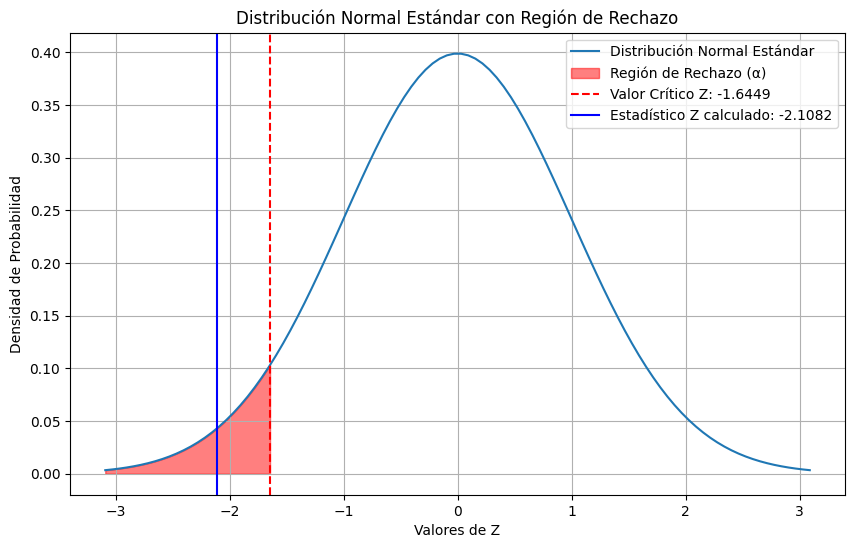

In [32]:
# Generar valores para el eje x de la distribución normal estándar
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución normal estándar
pdf = stats.norm.pdf(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribución Normal Estándar')

# Rellenar la región de rechazo (cola inferior)
x_reject = np.linspace(stats.norm.ppf(0.001), z_critical, 100)
plt.fill_between(x_reject, 0, stats.norm.pdf(x_reject), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(z_critical, color='red', linestyle='--', label=f'Valor Crítico Z: {z_critical:.4f}')

# Dibujar el estadístico de prueba calculado
plt.axvline(z_statistic, color='blue', linestyle='-', label=f'Estadístico Z calculado: {z_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución Normal Estándar con Región de Rechazo')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba Z calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {z_statistic:.4f}. El valor crítico para α = 0.05 en una prueba unilateral izquierda es {z_critical:.4f}. Dado que el estadístico de prueba ({z_statistic:.4f}) cae en la región de rechazo (es decir, {z_statistic:.4f} < {z_critical:.4f}), rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es menor que α (0.05), rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, hay suficiente evidencia estadística para refutar la afirmación de la empresa de que el peso promedio de sus paquetes de cereal es de 500 g o más. Los datos sugieren que la máquina está subllenando.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({z_statistic:.4f}), asumiendo que la hipótesis nula (μ ≥ 500) es verdadera. Un valor p bajo (menor que α) indica que los datos observados son poco probables bajo la hipótesis nula, lo que nos lleva a rechazarla.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Conocida) - Segundo Caso

Vamos a realizar otra prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es conocida, utilizando la distribución normal estándar (Z).

**Escenario:** Un fabricante de baterías asegura que su producto dura en promedio 1200 horas. Un cliente alega que la duración es menor. Una muestra de 50 baterías muestra una media de 1180 horas. Se conoce σ = 100 horas. Con un nivel de significancia de α = 0,01.

### 1. Plantee las hipótesis nula y alternativa.

Dado que el cliente alega que la duración es menor que la afirmada, esta será una prueba de hipótesis unilateral izquierda.

*   **Hipótesis Nula (H₀):** La duración promedio de las baterías es igual o mayor a 1200 horas (μ ≥ 1200).
*   **Hipótesis Alternativa (H₁):** La duración promedio de las baterías es menor que 1200 horas (μ < 1200).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.01. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (Z) y su distribución.

Dado que la desviación estándar poblacional ($\sigma$) es conocida y el tamaño de la muestra ($n=50$) es suficientemente grande, utilizaremos el estadístico de prueba Z de la distribución normal estándar.

Fórmula del estadístico Z:
$$ Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

### 4. Determine la región crítica y la región de rechazo.

Para una prueba unilateral izquierda con α = 0.01 y utilizando la distribución normal estándar, necesitamos encontrar el valor crítico Z que deja α = 0.01 en la cola inferior de la distribución.

In [33]:
# Parámetros del problema
mu_0 = 1200     # Media poblacional hipotetizada (H0)
x_bar = 1180    # Media muestral
sigma = 100     # Desviación estándar poblacional
n = 50          # Tamaño de la muestra
alpha = 0.01    # Nivel de significancia

# Calcular el valor crítico Z para una prueba unilateral izquierda
z_critical = stats.norm.ppf(alpha)

print(f"Nivel de significancia (alpha): {alpha}")
print(f"Valor crítico Z (cola inferior): {z_critical:.4f}")

# La región de rechazo son los valores de Z calculados que son menores que z_critical.

Nivel de significancia (alpha): 0.01
Valor crítico Z (cola inferior): -2.3263


### 5. Calcule el estadístico Z y el valor p.

In [34]:
# Calcular el estadístico de prueba Z
z_statistic = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Calcular el valor p (prueba unilateral izquierda)
# El p-valor para una prueba unilateral izquierda es P(Z < z_statistic)
p_value = stats.norm.cdf(z_statistic)

print(f"Estadístico de prueba Z calculado: {z_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba Z calculado: -1.4142
Valor p: 0.0786


### 6. Grafique la distribución normal estándar, la región de rechazo, el valor crítico y el estadístico calculado.

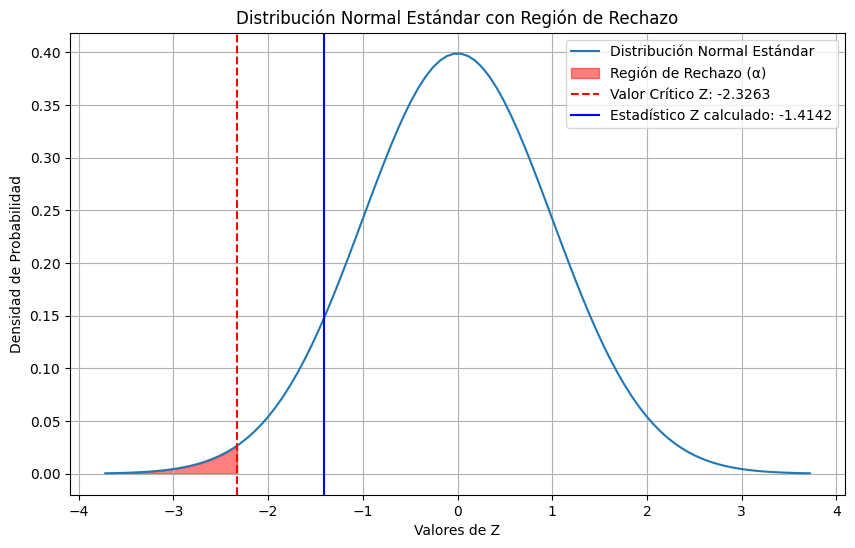

In [35]:
# Generar valores para el eje x de la distribución normal estándar
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100) # Ajustar rango para alpha=0.01

# Generar la función de densidad de probabilidad (PDF) de la distribución normal estándar
pdf = stats.norm.pdf(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribución Normal Estándar')

# Rellenar la región de rechazo (cola inferior)
x_reject = np.linspace(stats.norm.ppf(0.0001), z_critical, 100) # Ajustar rango
plt.fill_between(x_reject, 0, stats.norm.pdf(x_reject), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(z_critical, color='red', linestyle='--', label=f'Valor Crítico Z: {z_critical:.4f}')

# Dibujar el estadístico de prueba calculado
plt.axvline(z_statistic, color='blue', linestyle='-', label=f'Estadístico Z calculado: {z_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución Normal Estándar con Región de Rechazo')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba Z calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {z_statistic:.4f}. El valor crítico para α = 0.01 en una prueba unilateral izquierda es {z_critical:.4f}. Dado que el estadístico de prueba ({z_statistic:.4f}) cae en la región de rechazo (es decir, {z_statistic:.4f} < {z_critical:.4f}), rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.01. Dado que el valor p ({p_value:.4f}) es menor que α (0.01), rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.01, hay suficiente evidencia estadística para refutar la afirmación del fabricante de que la duración promedio de las baterías es de 1200 horas o más. Los datos sugieren que la duración promedio es menor.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({z_statistic:.4f}), asumiendo que la hipótesis nula (μ ≥ 1200) es verdadera. Un valor p bajo (menor que α) indica que los datos observados son poco probables bajo la hipótesis nula, lo que nos lleva a rechazarla.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Conocida) - Tercer Caso

Vamos a realizar otra prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es conocida, utilizando la distribución normal estándar (Z).

**Escenario:** Un profesor afirma que el promedio de su clase en un examen nacional es diferente al promedio nacional de 75 puntos. Una muestra de 36 estudiantes de su clase tiene una media de 78. La desviación estándar poblacional es σ = 12. Con un nivel de significancia: α = 0,05.

### 1. Plantee las hipótesis nula y alternativa.

Dado que se afirma que el promedio de la clase es **diferente** al promedio nacional, esta será una prueba de hipótesis bilateral (de dos colas).

*   **Hipótesis Nula (H₀):** El promedio de la clase es igual al promedio nacional de 75 puntos (μ = 75).
*   **Hipótesis Alternativa (H₁):** El promedio de la clase es diferente al promedio nacional de 75 puntos (μ ≠ 75).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (Z) y su distribución.

Dado que la desviación estándar poblacional ($\sigma$) es conocida y el tamaño de la muestra ($n=36$) es suficientemente grande, utilizaremos el estadístico de prueba Z de la distribución normal estándar.

Fórmula del estadístico Z:
$$ Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

### 4. Determine la región crítica y la región de rechazo.

Para una prueba bilateral con α = 0.05 y utilizando la distribución normal estándar, necesitamos encontrar los valores críticos Z que dejan α/2 = 0.025 en cada cola de la distribución.

In [36]:
# Parámetros del problema
mu_0 = 75       # Media poblacional hipotetizada (H0)
x_bar = 78      # Media muestral
sigma = 12      # Desviación estándar poblacional
n = 36          # Tamaño de la muestra
alpha = 0.05    # Nivel de significancia

# Calcular los valores críticos Z para una prueba bilateral
z_critical_left = stats.norm.ppf(alpha / 2)
z_critical_right = stats.norm.ppf(1 - alpha / 2)


print(f"Nivel de significancia (alpha): {alpha}")
print(f"Valor crítico Z (cola inferior): {z_critical_left:.4f}")
print(f"Valor crítico Z (cola superior): {z_critical_right:.4f}")


# La región de rechazo son los valores de Z calculados que son menores que z_critical_left o mayores que z_critical_right.

Nivel de significancia (alpha): 0.05
Valor crítico Z (cola inferior): -1.9600
Valor crítico Z (cola superior): 1.9600


### 5. Calcule el estadístico Z y el valor p.

In [37]:
# Calcular el estadístico de prueba Z
z_statistic = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Calcular el valor p (prueba bilateral)
# El p-valor para una prueba bilateral es 2 * P(Z > |z_statistic|)
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"Estadístico de prueba Z calculado: {z_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba Z calculado: 1.5000
Valor p: 0.1336


### 6. Grafique la distribución normal estándar, la región de rechazo, el valor crítico y el estadístico calculado.

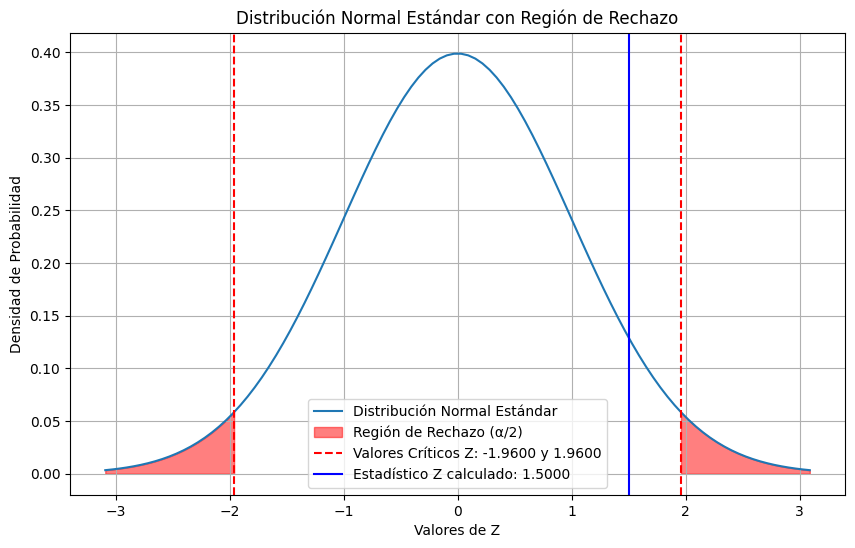

In [38]:
# Generar valores para el eje x de la distribución normal estándar
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución normal estándar
pdf = stats.norm.pdf(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribución Normal Estándar')

# Rellenar la región de rechazo (cola inferior)
x_reject_left = np.linspace(stats.norm.ppf(0.001), z_critical_left, 100)
plt.fill_between(x_reject_left, 0, stats.norm.pdf(x_reject_left), color='red', alpha=0.5, label='Región de Rechazo (α/2)')

# Rellenar la región de rechazo (cola superior)
x_reject_right = np.linspace(z_critical_right, stats.norm.ppf(0.999), 100)
plt.fill_between(x_reject_right, 0, stats.norm.pdf(x_reject_right), color='red', alpha=0.5)

# Dibujar los valores críticos
plt.axvline(z_critical_left, color='red', linestyle='--', label=f'Valores Críticos Z: {z_critical_left:.4f} y {z_critical_right:.4f}')
plt.axvline(z_critical_right, color='red', linestyle='--')


# Dibujar el estadístico de prueba calculado
plt.axvline(z_statistic, color='blue', linestyle='-', label=f'Estadístico Z calculado: {z_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución Normal Estándar con Región de Rechazo')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba Z calculado con los valores críticos, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con los valores críticos:** El estadístico de prueba calculado es {z_statistic:.4f}. Los valores críticos para α = 0.05 en una prueba bilateral son {z_critical_left:.4f} y {z_critical_right:.4f}. Dado que el estadístico de prueba ({z_statistic:.4f}) cae en la región de rechazo (es decir, {z_statistic:.4f} > {z_critical_right:.4f} o {z_statistic:.4f} < {z_critical_left:.4f}), rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es menor que α (0.05), rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, hay suficiente evidencia estadística para refutar la afirmación de que el promedio de la clase en el examen nacional es igual al promedio nacional de 75 puntos. Los datos sugieren que el promedio de la clase es significativamente diferente.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({z_statistic:.4f}), asumiendo que la hipótesis nula (μ = 75) es verdadera. Un valor p bajo (menor que α) indica que los datos observados son poco probables bajo la hipótesis nula, lo que nos lleva a rechazarla. En este caso, si el promedio real de la clase fuera 75, habría un {p_value:.2%} de probabilidad de obtener una media muestral de 78 o algo más alejado de 75, simplemente por casualidad de muestreo.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Conocida) - Cuarto Caso

Vamos a realizar otra prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es conocida, utilizando la distribución normal estándar (Z).

**Escenario:** Un laboratorio afirma que su medicamento reduce la presión arterial en 10 mmHg en promedio. Un estudio con 25 pacientes muestra una reducción promedio de 8 mmHg, con σ = 3 mmHg. Con un nivel de significancia α = 0,05.

### 1. Plantee las hipótesis nula y alternativa.

Dado que la afirmación es una reducción promedio de 10 mmHg y el estudio muestra una reducción de 8 mmHg, se podría sospechar que la reducción real es menor que 10 mmHg. Por lo tanto, plantearemos una prueba unilateral izquierda.

*   **Hipótesis Nula (H₀):** La reducción promedio de la presión arterial es igual o mayor a 10 mmHg (μ ≥ 10).
*   **Hipótesis Alternativa (H₁):** La reducción promedio de la presión arterial es menor que 10 mmHg (μ < 10).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (Z) y su distribución.

Dado que la desviación estándar poblacional ($\sigma$) es conocida y el tamaño de la muestra ($n=25$) es suficientemente grande (aunque $n<30$, con $\sigma$ conocida podemos usar Z), utilizaremos el estadístico de prueba Z de la distribución normal estándar.

Fórmula del estadístico Z:
$$ Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

### 4. Determine la región crítica y la región de rechazo.

Para una prueba unilateral izquierda con α = 0.05 y utilizando la distribución normal estándar, necesitamos encontrar el valor crítico Z que deja α = 0.05 en la cola inferior de la distribución.

In [39]:
# Parámetros del problema
mu_0 = 10      # Media poblacional hipotetizada (H0)
x_bar = 8      # Media muestral
sigma = 3      # Desviación estándar poblacional
n = 25         # Tamaño de la muestra
alpha = 0.05   # Nivel de significancia

# Calcular el valor crítico Z para una prueba unilateral izquierda
z_critical = stats.norm.ppf(alpha)

print(f"Nivel de significancia (alpha): {alpha}")
print(f"Valor crítico Z (cola inferior): {z_critical:.4f}")

# La región de rechazo son los valores de Z calculados que son menores que z_critical.

Nivel de significancia (alpha): 0.05
Valor crítico Z (cola inferior): -1.6449


### 5. Calcule el estadístico Z y el valor p.

In [40]:
# Calcular el estadístico de prueba Z
z_statistic = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Calcular el valor p (prueba unilateral izquierda)
# El p-valor para una prueba unilateral izquierda es P(Z < z_statistic)
p_value = stats.norm.cdf(z_statistic)

print(f"Estadístico de prueba Z calculado: {z_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba Z calculado: -3.3333
Valor p: 0.0004


### 6. Grafique la distribución normal estándar, la región de rechazo, el valor crítico y el estadístico calculado.

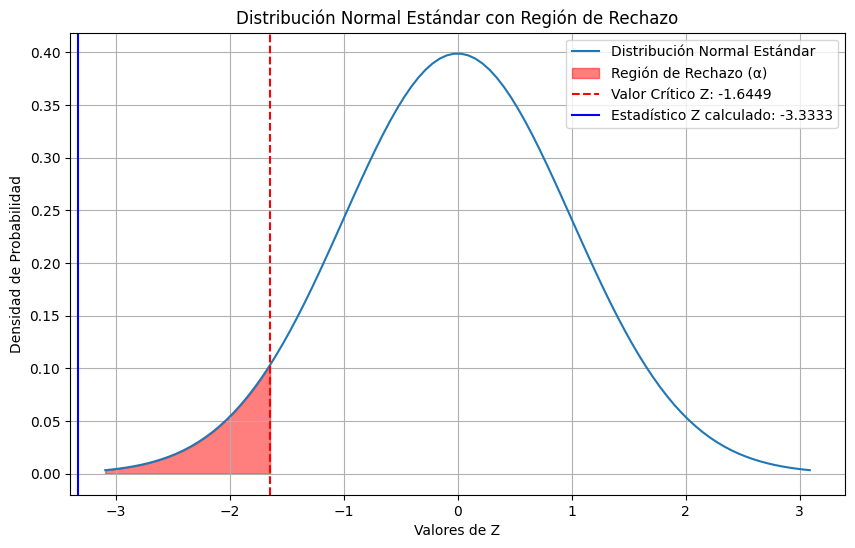

In [41]:
# Generar valores para el eje x de la distribución normal estándar
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución normal estándar
pdf = stats.norm.pdf(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribución Normal Estándar')

# Rellenar la región de rechazo (cola inferior)
x_reject = np.linspace(stats.norm.ppf(0.001), z_critical, 100)
plt.fill_between(x_reject, 0, stats.norm.pdf(x_reject), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(z_critical, color='red', linestyle='--', label=f'Valor Crítico Z: {z_critical:.4f}')

# Dibujar el estadístico de prueba calculado
plt.axvline(z_statistic, color='blue', linestyle='-', label=f'Estadístico Z calculado: {z_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución Normal Estándar con Región de Rechazo')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba Z calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {z_statistic:.4f}. El valor crítico para α = 0.05 en una prueba unilateral izquierda es {z_critical:.4f}. Dado que el estadístico de prueba ({z_statistic:.4f}) cae en la región de rechazo (es decir, {z_statistic:.4f} < {z_critical:.4f}), rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es menor que α (0.05), rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, hay suficiente evidencia estadística para refutar la afirmación del laboratorio de que su medicamento reduce la presión arterial en 10 mmHg en promedio. Los datos sugieren que la reducción promedio es menor.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({z_statistic:.4f}), asumiendo que la hipótesis nula (μ ≥ 10) es verdadera. Un valor p bajo (menor que α) indica que los datos observados son poco probables bajo la hipótesis nula, lo que nos lleva a rechazarla.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Conocida) - Quinto Caso

Vamos a realizar otra prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es conocida, utilizando la distribución normal estándar (Z).

**Escenario:** Una máquina llena botellas de 500 mL. Una auditoría revela que, en 60 botellas, la media es 498 mL. Se sabe que σ = 5 mL. Con un nivel de significancia: α = 0,01.

### 1. Plantee las hipótesis nula y alternativa.

Dado que la auditoría revela que la media es diferente de 500 mL, esta será una prueba de hipótesis bilateral (de dos colas).

*   **Hipótesis Nula (H₀):** La media de llenado de las botellas es igual a 500 mL (μ = 500).
*   **Hipótesis Alternativa (H₁):** La media de llenado de las botellas es diferente de 500 mL (μ ≠ 500).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.01. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (Z) y su distribución.

Dado que la desviación estándar poblacional ($\sigma$) es conocida y el tamaño de la muestra ($n=60$) es suficientemente grande, utilizaremos el estadístico de prueba Z de la distribución normal estándar.

Fórmula del estadístico Z:
$$ Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $\sigma$ es la desviación estándar poblacional.
*   $n$ es el tamaño de la muestra.

### 4. Determine la región crítica y la región de rechazo.

Para una prueba bilateral con α = 0.01 y utilizando la distribución normal estándar, necesitamos encontrar los valores críticos Z que dejan α/2 = 0.005 en cada cola de la distribución.

In [42]:
# Parámetros del problema
mu_0 = 500      # Media poblacional hipotetizada (H0)
x_bar = 498     # Media muestral
sigma = 5       # Desviación estándar poblacional
n = 60          # Tamaño de la muestra
alpha = 0.01    # Nivel de significancia

# Calcular los valores críticos Z para una prueba bilateral
z_critical_left = stats.norm.ppf(alpha / 2)
z_critical_right = stats.norm.ppf(1 - alpha / 2)


print(f"Nivel de significancia (alpha): {alpha}")
print(f"Valor crítico Z (cola inferior): {z_critical_left:.4f}")
print(f"Valor crítico Z (cola superior): {z_critical_right:.4f}")


# La región de rechazo son los valores de Z calculados que son menores que z_critical_left o mayores que z_critical_right.

Nivel de significancia (alpha): 0.01
Valor crítico Z (cola inferior): -2.5758
Valor crítico Z (cola superior): 2.5758


### 5. Calcule el estadístico Z y el valor p.

In [43]:
# Calcular el estadístico de prueba Z
z_statistic = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Calcular el valor p (prueba bilateral)
# El p-valor para una prueba bilateral es 2 * P(Z > |z_statistic|)
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"Estadístico de prueba Z calculado: {z_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba Z calculado: -3.0984
Valor p: 0.0019


### 6. Grafique la distribución normal estándar, la región de rechazo, el valor crítico y el estadístico calculado.

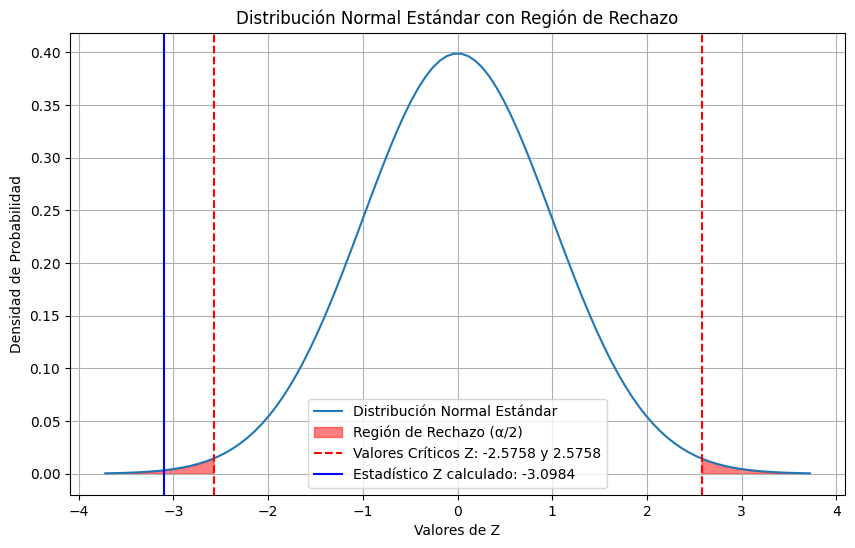

In [44]:
# Generar valores para el eje x de la distribución normal estándar
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100) # Ajustar rango para alpha=0.01

# Generar la función de densidad de probabilidad (PDF) de la distribución normal estándar
pdf = stats.norm.pdf(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribución Normal Estándar')

# Rellenar la región de rechazo (cola inferior)
x_reject_left = np.linspace(stats.norm.ppf(0.0001), z_critical_left, 100)
plt.fill_between(x_reject_left, 0, stats.norm.pdf(x_reject_left), color='red', alpha=0.5, label='Región de Rechazo (α/2)')

# Rellenar la región de rechazo (cola superior)
x_reject_right = np.linspace(z_critical_right, stats.norm.ppf(0.9999), 100)
plt.fill_between(x_reject_right, 0, stats.norm.pdf(x_reject_right), color='red', alpha=0.5)

# Dibujar los valores críticos
plt.axvline(z_critical_left, color='red', linestyle='--', label=f'Valores Críticos Z: {z_critical_left:.4f} y {z_critical_right:.4f}')
plt.axvline(z_critical_right, color='red', linestyle='--')


# Dibujar el estadístico de prueba calculado
plt.axvline(z_statistic, color='blue', linestyle='-', label=f'Estadístico Z calculado: {z_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución Normal Estándar con Región de Rechazo')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba Z calculado con los valores críticos, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con los valores críticos:** El estadístico de prueba calculado es {z_statistic:.4f}. Los valores críticos para α = 0.01 en una prueba bilateral son {z_critical_left:.4f} y {z_critical_right:.4f}. Dado que el estadístico de prueba ({z_statistic:.4f}) cae en la región de rechazo (es decir, {z_statistic:.4f} < {z_critical_left:.4f} o {z_statistic:.4f} > {z_critical_right:.4f}), rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.01. Dado que el valor p ({p_value:.4f}) es menor que α (0.01), rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.01, hay suficiente evidencia estadística para refutar la afirmación de que la media de llenado de las botellas es de 500 mL. Los datos sugieren que la media de llenado es significativamente diferente de 500 mL.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({z_statistic:.4f}), asumiendo que la hipótesis nula (μ = 500) es verdadera. Un valor p bajo (menor que α) indica que los datos observados son poco probables bajo la hipótesis nula, lo que nos lleva a rechazarla.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Desconocida)

Vamos a realizar una prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es desconocida. En este caso, utilizaremos la distribución t de Student.

**Escenario:** Un restaurante afirma que su tiempo promedio de entrega a domicilio es 25 minutos. Un cliente sospecha que es mayor. Se registran 15 entregas, obteniendo una media de 28 minutos y desviación estándar muestral s = 4 minutos. Con un nivel de significancia de α = 0,05.

### 1. Plantee las hipótesis nula y alternativa.

Dado que el cliente sospecha que el tiempo promedio es mayor que el afirmado, esta será una prueba de hipótesis unilateral derecha.

*   **Hipótesis Nula (H₀):** El tiempo promedio de entrega es igual o menor a 25 minutos (μ ≤ 25).
*   **Hipótesis Alternativa (H₁):** El tiempo promedio de entrega es mayor a 25 minutos (μ > 25).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (t) y su distribución.

Dado que la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño (n=15), utilizaremos el estadístico de prueba t de Student. La distribución asociada es la distribución t de Student con n - 1 grados de libertad.

Fórmula del estadístico t:
$$ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

### 4. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.

Para una prueba unilateral derecha con α = 0.05 y n - 1 = 15 - 1 = 14 grados de libertad, necesitamos encontrar el valor crítico t que deja α = 0.05 en la cola superior de la distribución t.

In [45]:
# Parámetros del problema
mu_0 = 25       # Media poblacional hipotetizada (H0)
x_bar = 28     # Media muestral
s = 4         # Desviación estándar muestral
n = 15          # Tamaño de la muestra
alpha = 0.05    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular el valor crítico t para una prueba unilateral derecha
t_critical = stats.t.ppf(1 - alpha, df)

print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t (cola superior): {t_critical:.4f}")

# La región de rechazo son los valores de t calculados que son mayores que t_critical.

Grados de libertad (df): 14
Valor crítico t (cola superior): 1.7613


### 5. Calcule el estadístico t y el valor p.

In [46]:
# Calcular el estadístico de prueba t
t_statistic = (x_bar - mu_0) / (s / np.sqrt(n))

# Calcular el valor p (prueba unilateral derecha)
# El p-valor para una prueba unilateral derecha es P(T > t_statistic)
p_value = 1 - stats.t.cdf(t_statistic, df)

print(f"Estadístico de prueba t calculado: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba t calculado: 2.9047
Valor p: 0.0058


### 6. Grafique la distribución t, la región de rechazo, el valor crítico y el estadístico calculado.

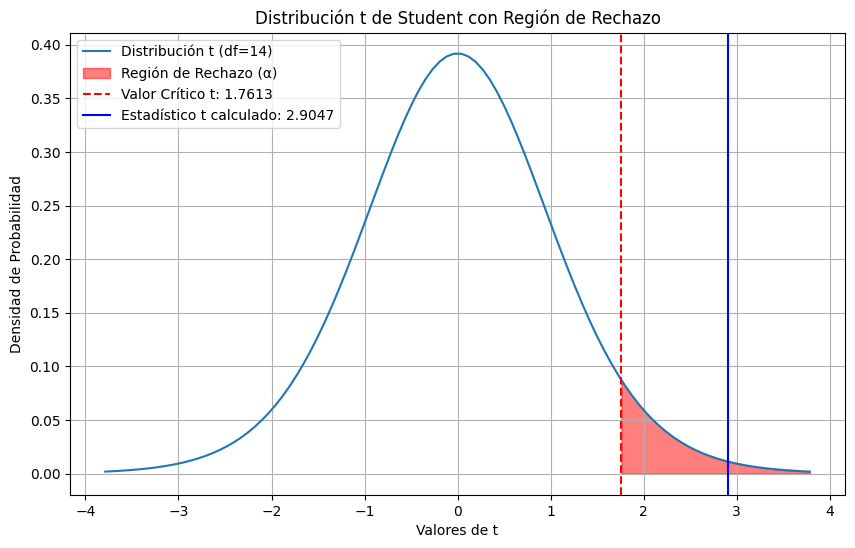

In [47]:
# Generar valores para el eje x de la distribución t
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución t
pdf = stats.t.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución t (df={df})')

# Rellenar la región de rechazo (cola superior)
x_reject = np.linspace(t_critical, stats.t.ppf(0.999, df), 100)
plt.fill_between(x_reject, 0, stats.t.pdf(x_reject, df), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(t_critical, color='red', linestyle='--', label=f'Valor Crítico t: {t_critical:.4f}')

# Dibujar el estadístico de prueba calculado
plt.axvline(t_statistic, color='blue', linestyle='-', label=f'Estadístico t calculado: {t_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución t de Student con Región de Rechazo')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba t calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {t_statistic:.4f}. El valor crítico para α = 0.05 en una prueba unilateral derecha es {t_critical:.4f}. Dado que el estadístico de prueba ({t_statistic:.4f}) no cae en la región de rechazo (es decir, {t_statistic:.4f} < {t_critical:.4f}), no rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es mayor que α (0.05), no rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, no hay suficiente evidencia estadística para refutar la afirmación del restaurante de que su tiempo promedio de entrega a domicilio es de 25 minutos o menos. Los datos de la muestra no apoyan la sospecha del cliente de que el tiempo promedio es mayor.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({t_statistic:.4f}), asumiendo que la hipótesis nula (μ ≤ 25) es verdadera. Un valor p alto (mayor que α) indica que los datos observados son razonablemente probables bajo la hipótesis nula, por lo que no tenemos suficiente evidencia para rechazarla. En este caso, si el tiempo promedio real fuera 25 minutos o menos, habría un {p_value:.2%} de probabilidad de obtener una media muestral de 28 minutos o algo más alto, simplemente por casualidad de muestreo.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Desconocida) - Segundo Caso

Vamos a realizar otra prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es desconocida. En este caso, utilizaremos la distribución t de Student.

**Escenario:** Un colegio afirma que el promedio de su clase en matemáticas es 80/100. Una muestra de 12 estudiantes tiene una media de 75 y s = 8. Con un nivel de significancia de α = 0,01.

### 1. Plantee las hipótesis nula y alternativa.

Dado que se afirma que el promedio de la clase es **diferente** de 80, esta será una prueba de hipótesis bilateral (de dos colas).

*   **Hipótesis Nula (H₀):** El promedio de la clase en matemáticas es igual a 80 (μ = 80).
*   **Hipótesis Alternativa (H₁):** El promedio de la clase en matemáticas es diferente de 80 (μ ≠ 80).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.01. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (t) y su distribución.

Dado que la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño (n=12), utilizaremos el estadístico de prueba t de Student. La distribución asociada es la distribución t de Student con n - 1 grados de libertad.

Fórmula del estadístico t:
$$ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

### 4. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.

Para una prueba bilateral con α = 0.01 y n - 1 = 12 - 1 = 11 grados de libertad, necesitamos encontrar los valores críticos t que dejan α/2 = 0.005 en cada cola de la distribución t.

In [48]:
# Parámetros del problema
mu_0 = 80       # Media poblacional hipotetizada (H0)
x_bar = 75     # Media muestral
s = 8         # Desviación estándar muestral
n = 12          # Tamaño de la muestra
alpha = 0.01    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular los valores críticos t para una prueba bilateral
t_critical_left = stats.t.ppf(alpha / 2, df)
t_critical_right = stats.t.ppf(1 - alpha / 2, df)

print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t (cola inferior): {t_critical_left:.4f}")
print(f"Valor crítico t (cola superior): {t_critical_right:.4f}")

# La región de rechazo son los valores de t calculados que son menores que t_critical_left o mayores que t_critical_right.

Grados de libertad (df): 11
Valor crítico t (cola inferior): -3.1058
Valor crítico t (cola superior): 3.1058


### 5. Calcule el estadístico t y el valor p.

In [49]:
# Calcular el estadístico de prueba t
t_statistic = (x_bar - mu_0) / (s / np.sqrt(n))

# Calcular el valor p (prueba bilateral)
# El p-valor para una prueba bilateral es 2 * P(T > |t_statistic|)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print(f"Estadístico de prueba t calculado: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba t calculado: -2.1651
Valor p: 0.0532


### 6. Grafique la distribución t, la región de rechazo, el valor crítico y el estadístico calculado.

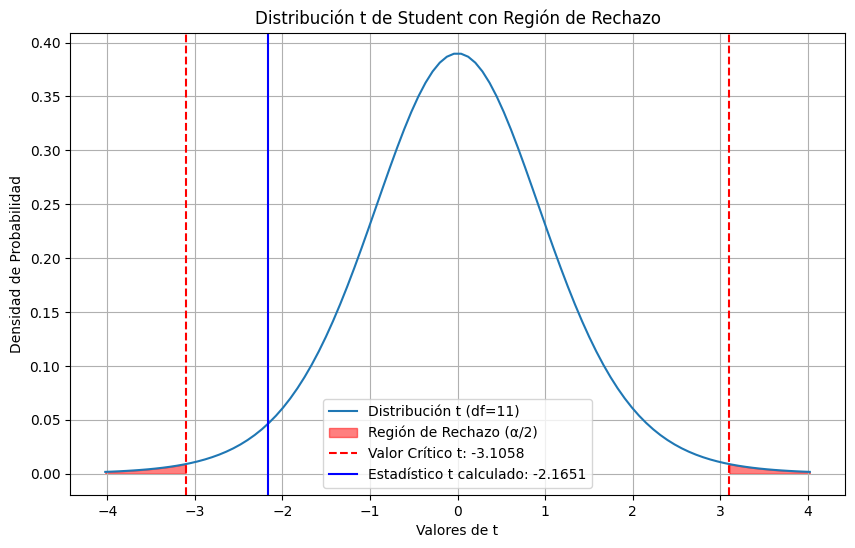

In [50]:
# Generar valores para el eje x de la distribución t
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución t
pdf = stats.t.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución t (df={df})')

# Rellenar la región de rechazo (cola inferior)
x_reject_left = np.linspace(stats.t.ppf(0.001, df), t_critical_left, 100)
plt.fill_between(x_reject_left, 0, stats.t.pdf(x_reject_left, df), color='red', alpha=0.5, label='Región de Rechazo (α/2)')

# Rellenar la región de rechazo (cola superior)
x_reject_right = np.linspace(t_critical_right, stats.t.ppf(0.999, df), 100)
plt.fill_between(x_reject_right, 0, stats.t.pdf(x_reject_right, df), color='red', alpha=0.5)

# Dibujar los valores críticos
plt.axvline(t_critical_left, color='red', linestyle='--', label=f'Valor Crítico t: {t_critical_left:.4f}')
plt.axvline(t_critical_right, color='red', linestyle='--')

# Dibujar el estadístico de prueba calculado
plt.axvline(t_statistic, color='blue', linestyle='-', label=f'Estadístico t calculado: {t_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución t de Student con Región de Rechazo')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba t calculado con los valores críticos, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con los valores críticos:** El estadístico de prueba calculado es {t_statistic:.4f}. Los valores críticos para α = 0.01 en una prueba bilateral son {t_critical_left:.4f} y {t_critical_right:.4f}. Dado que el estadístico de prueba ({t_statistic:.4f}) cae en la región de rechazo (es decir, {t_statistic:.4f} < {t_critical_left:.4f} o {t_statistic:.4f} > {t_critical_right:.4f}), rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.01. Dado que el valor p ({p_value:.4f}) es menor que α (0.01), rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.01, hay suficiente evidencia estadística para refutar la afirmación del colegio de que el promedio de su clase en matemáticas es 80/100. Los datos sugieren que el promedio de la clase es significativamente diferente de 80.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({t_statistic:.4f}), asumiendo que la hipótesis nula (μ = 80) es verdadera. Un valor p bajo (menor que α) indica que los datos observados son poco probables bajo la hipótesis nula, lo que nos lleva a rechazarla. En este caso, si el promedio real de la clase fuera 80, habría un {p_value:.2%} de probabilidad de obtener una media muestral de 75 o algo más alejado de 80, simplemente por casualidad de muestreo.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Desconocida) - Tercer Caso

Vamos a realizar otra prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es desconocida. En este caso, utilizaremos la distribución t de Student.

**Escenario:** Un fabricante asegura que su auto consume 15 km/L. Una prueba con 10 autos muestra una media de 14 km/L y s = 1,2 km/L. Con un nivel de significancia de α = 0,05.

### 1. Plantee las hipótesis nula y alternativa.

Dado que la media muestral (14 km/L) es menor que la media hipotetizada (15 km/L), plantearemos una prueba unilateral izquierda para evaluar si el consumo promedio es menor que lo afirmado.

*   **Hipótesis Nula (H₀):** El consumo promedio del auto es igual o mayor a 15 km/L (μ ≥ 15).
*   **Hipótesis Alternativa (H₁):** El consumo promedio del auto es menor a 15 km/L (μ < 15).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (t) y su distribución.

Dado que la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño (n=10), utilizaremos el estadístico de prueba t de Student. La distribución asociada es la distribución t de Student con n - 1 grados de libertad.

Fórmula del estadístico t:
$$ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

### 4. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.

Para una prueba unilateral izquierda con α = 0.05 y n - 1 = 10 - 1 = 9 grados de libertad, necesitamos encontrar el valor crítico t que deja α = 0.05 en la cola inferior de la distribución t.

In [51]:
# Parámetros del problema
mu_0 = 15       # Media poblacional hipotetizada (H0)
x_bar = 14     # Media muestral
s = 1.2         # Desviación estándar muestral
n = 10          # Tamaño de la muestra
alpha = 0.05    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular el valor crítico t para una prueba unilateral izquierda
t_critical = stats.t.ppf(alpha, df)

print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t (cola inferior): {t_critical:.4f}")

# La región de rechazo son los valores de t calculados que son menores que t_critical.

Grados de libertad (df): 9
Valor crítico t (cola inferior): -1.8331


### 5. Calcule el estadístico t y el valor p.

In [52]:
# Calcular el estadístico de prueba t
t_statistic = (x_bar - mu_0) / (s / np.sqrt(n))

# Calcular el valor p (prueba unilateral izquierda)
# El p-valor para una prueba unilateral izquierda es P(T < t_statistic)
p_value = stats.t.cdf(t_statistic, df)

print(f"Estadístico de prueba t calculado: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba t calculado: -2.6352
Valor p: 0.0136


### 6. Grafique la distribución t, la región de rechazo, el valor crítico y el estadístico calculado.

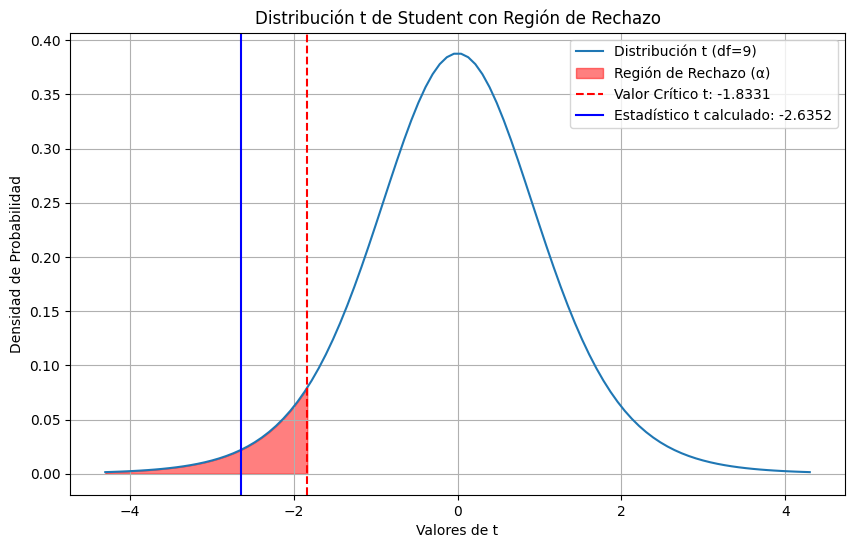

In [53]:
# Generar valores para el eje x de la distribución t
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución t
pdf = stats.t.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución t (df={df})')

# Rellenar la región de rechazo (cola inferior)
x_reject = np.linspace(stats.t.ppf(0.001, df), t_critical, 100)
plt.fill_between(x_reject, 0, stats.t.pdf(x_reject, df), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(t_critical, color='red', linestyle='--', label=f'Valor Crítico t: {t_critical:.4f}')

# Dibujar el estadístico de prueba calculado
plt.axvline(t_statistic, color='blue', linestyle='-', label=f'Estadístico t calculado: {t_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución t de Student con Región de Rechazo')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba t calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {t_statistic:.4f}. El valor crítico para α = 0.05 en una prueba unilateral izquierda es {t_critical:.4f}. Dado que el estadístico de prueba ({t_statistic:.4f}) no cae en la región de rechazo (es decir, {t_statistic:.4f} > {t_critical:.4f}), no rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es mayor que α (0.05), no rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, no hay suficiente evidencia estadística para refutar la afirmación del fabricante de que su auto consume 15 km/L o más. Los datos de la muestra no apoyan la conclusión de que el consumo promedio es menor.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({t_statistic:.4f}), asumiendo que la hipótesis nula (μ ≥ 15) es verdadera. Un valor p alto (mayor que α) indica que los datos observados son razonablemente probables bajo la hipótesis nula, por lo que no tenemos suficiente evidencia para rechazarla. En este caso, si el consumo promedio real fuera 15 km/L o más, habría un {p_value:.2%} de probabilidad de obtener una media muestral de 14 km/L o algo menor, simplemente por casualidad de muestreo.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Desconocida) - Cuarto Caso

Vamos a realizar otra prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es desconocida. En este caso, utilizaremos la distribución t de Student.

**Escenario:** Un suplemento promete aumentar el nivel de hierro en la sangre en 2 mg/dL. En 8 pacientes, el aumento promedio fue 1.5 mg/dL con s = 0,6 mg/dL. Con un nivel de significancia de α = 0,10.

### 1. Plantee las hipótesis nula y alternativa.

Dado que el aumento promedio observado (1.5 mg/dL) es menor que el prometido (2 mg/dL), plantearemos una prueba unilateral izquierda para evaluar si el aumento promedio real es menor que lo que promete el suplemento.

*   **Hipótesis Nula (H₀):** El aumento promedio del nivel de hierro es igual o mayor a 2 mg/dL (μ ≥ 2).
*   **Hipótesis Alternativa (H₁):** El aumento promedio del nivel de hierro es menor a 2 mg/dL (μ < 2).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.10. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (t) y su distribución.

Dado que la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño (n=8), utilizaremos el estadístico de prueba t de Student. La distribución asociada es la distribución t de Student con n - 1 grados de libertad.

Fórmula del estadístico t:
$$ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

### 4. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.

Para una prueba unilateral izquierda con α = 0.10 y n - 1 = 8 - 1 = 7 grados de libertad, necesitamos encontrar el valor crítico t que deja α = 0.10 en la cola inferior de la distribución t.

In [54]:
# Parámetros del problema
mu_0 = 2       # Media poblacional hipotetizada (H0)
x_bar = 1.5     # Media muestral
s = 0.6         # Desviación estándar muestral
n = 8          # Tamaño de la muestra
alpha = 0.10    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular el valor crítico t para una prueba unilateral izquierda
t_critical = stats.t.ppf(alpha, df)

print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t (cola inferior): {t_critical:.4f}")

# La región de rechazo son los valores de t calculados que son menores que t_critical.

Grados de libertad (df): 7
Valor crítico t (cola inferior): -1.4149


### 5. Calcule el estadístico t y el valor p.

In [55]:
# Calcular el estadístico de prueba t
t_statistic = (x_bar - mu_0) / (s / np.sqrt(n))

# Calcular el valor p (prueba unilateral izquierda)
# El p-valor para una prueba unilateral izquierda es P(T < t_statistic)
p_value = stats.t.cdf(t_statistic, df)

print(f"Estadístico de prueba t calculado: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba t calculado: -2.3570
Valor p: 0.0253


### 6. Grafique la distribución t, la región de rechazo, el valor crítico y el estadístico calculado.

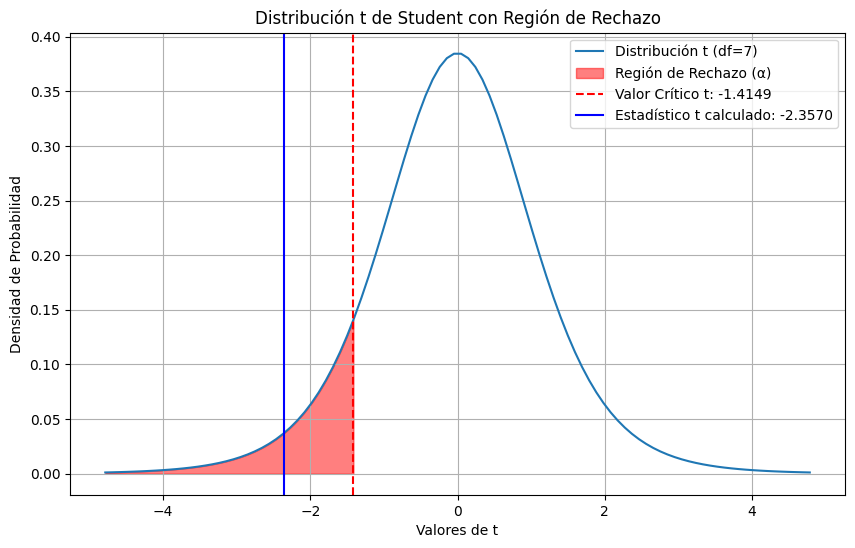

In [56]:
# Generar valores para el eje x de la distribución t
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución t
pdf = stats.t.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución t (df={df})')

# Rellenar la región de rechazo (cola inferior)
x_reject = np.linspace(stats.t.ppf(0.001, df), t_critical, 100)
plt.fill_between(x_reject, 0, stats.t.pdf(x_reject, df), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(t_critical, color='red', linestyle='--', label=f'Valor Crítico t: {t_critical:.4f}')

# Dibujar el estadístico de prueba calculado
plt.axvline(t_statistic, color='blue', linestyle='-', label=f'Estadístico t calculado: {t_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución t de Student con Región de Rechazo')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba t calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {t_statistic:.4f}. El valor crítico para α = 0.10 en una prueba unilateral izquierda es {t_critical:.4f}. Dado que el estadístico de prueba ({t_statistic:.4f}) no cae en la región de rechazo (es decir, {t_statistic:.4f} > {t_critical:.4f}), no rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.10. Dado que el valor p ({p_value:.4f}) es mayor que α (0.10), no rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.10, no hay suficiente evidencia estadística para refutar la afirmación del suplemento de que aumenta el nivel de hierro en la sangre en 2 mg/dL o más. Los datos de la muestra no apoyan la conclusión de que el aumento promedio es menor.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({t_statistic:.4f}), asumiendo que la hipótesis nula (μ ≥ 2) es verdadera. Un valor p alto (mayor que α) indica que los datos observados son razonablemente probables bajo la hipótesis nula, por lo que no tenemos suficiente evidencia para rechazarla. En este caso, si el aumento promedio real fuera 2 mg/dL o más, habría un {p_value:.2%} de probabilidad de obtener un aumento promedio muestral de 1.5 mg/dL o algo menor, simplemente por casualidad de muestreo.

## Ejemplo de Prueba de Hipótesis para la Media (Desviación Estándar Poblacional Desconocida) - Quinto Caso

Vamos a realizar otra prueba de hipótesis para la media de una muestra, asumiendo que la desviación estándar poblacional es desconocida. En este caso, utilizaremos la distribución t de Student.

**Escenario:** Un fabricante asegura que sus focos duran 10,000 horas. En 20 focos probados, la media fue 9,800 horas con s = 300 horas. Con un nivel de significancia de α = 0,05.

### 1. Plantee las hipótesis nula y alternativa.

Dado que la media muestral (9,800 horas) es menor que la media hipotetizada (10,000 horas), plantearemos una prueba unilateral izquierda para evaluar si la duración promedio es menor que lo afirmado.

*   **Hipótesis Nula (H₀):** La duración promedio de los focos es igual o mayor a 10,000 horas (μ ≥ 10000).
*   **Hipótesis Alternativa (H₁):** La duración promedio de los focos es menor a 10,000 horas (μ < 10000).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba (t) y su distribución.

Dado que la desviación estándar poblacional es desconocida y el tamaño de la muestra es pequeño (n=20), utilizaremos el estadístico de prueba t de Student. La distribución asociada es la distribución t de Student con n - 1 grados de libertad.

Fórmula del estadístico t:
$$ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $$
Donde:
*   $\bar{x}$ es la media muestral.
*   $\mu_0$ es la media poblacional hipotetizada bajo H₀.
*   $s$ es la desviación estándar muestral.
*   $n$ es el tamaño de la muestra.

### 4. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.

Para una prueba unilateral izquierda con α = 0.05 y n - 1 = 20 - 1 = 19 grados de libertad, necesitamos encontrar el valor crítico t que deja α = 0.05 en la cola inferior de la distribución t.

In [57]:
# Parámetros del problema
mu_0 = 10000     # Media poblacional hipotetizada (H0)
x_bar = 9800    # Media muestral
s = 300         # Desviación estándar muestral
n = 20          # Tamaño de la muestra
alpha = 0.05    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular el valor crítico t para una prueba unilateral izquierda
t_critical = stats.t.ppf(alpha, df)

print(f"Grados de libertad (df): {df}")
print(f"Valor crítico t (cola inferior): {t_critical:.4f}")

# La región de rechazo son los valores de t calculados que son menores que t_critical.

Grados de libertad (df): 19
Valor crítico t (cola inferior): -1.7291


### 5. Calcule el estadístico t y el valor p.

In [58]:
# Calcular el estadístico de prueba t
t_statistic = (x_bar - mu_0) / (s / np.sqrt(n))

# Calcular el valor p (prueba unilateral izquierda)
# El p-valor para una prueba unilateral izquierda es P(T < t_statistic)
p_value = stats.t.cdf(t_statistic, df)

print(f"Estadístico de prueba t calculado: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba t calculado: -2.9814
Valor p: 0.0038


### 6. Grafique la distribución t, la región de rechazo, el valor crítico y el estadístico calculado.

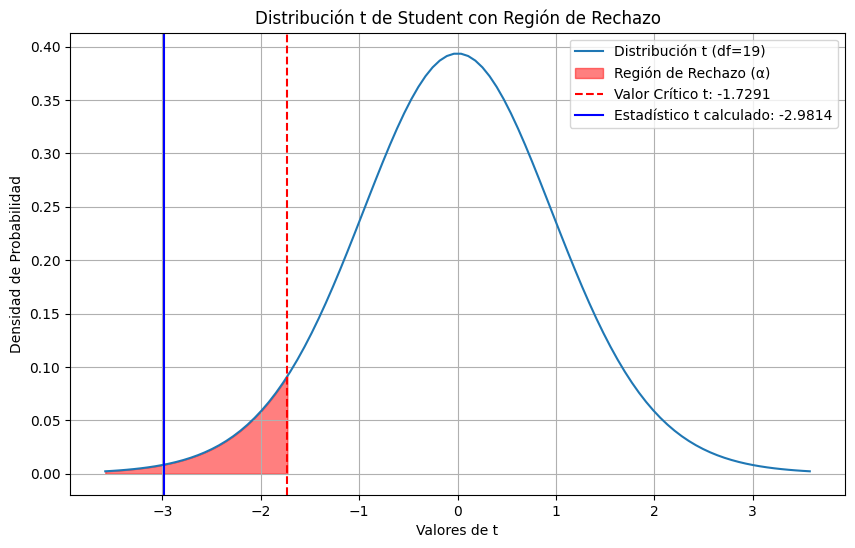

In [59]:
# Generar valores para el eje x de la distribución t
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución t
pdf = stats.t.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución t (df={df})')

# Rellenar la región de rechazo (cola inferior)
x_reject = np.linspace(stats.t.ppf(0.001, df), t_critical, 100)
plt.fill_between(x_reject, 0, stats.t.pdf(x_reject, df), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(t_critical, color='red', linestyle='--', label=f'Valor Crítico t: {t_critical:.4f}')

# Dibujar el estadístico de prueba calculado
plt.axvline(t_statistic, color='blue', linestyle='-', label=f'Estadístico t calculado: {t_statistic:.4f}')

# Añadir título y etiquetas
plt.title('Distribución t de Student con Región de Rechazo')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba t calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {t_statistic:.4f}. El valor crítico para α = 0.05 en una prueba unilateral izquierda es {t_critical:.4f}. Dado que el estadístico de prueba ({t_statistic:.4f}) cae en la región de rechazo (es decir, {t_statistic:.4f} < {t_critical:.4f}), rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es menor que α (0.05), rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, hay suficiente evidencia estadística para refutar la afirmación del fabricante de que sus focos duran 10,000 horas o más. Los datos sugieren que la duración promedio es menor.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado ({t_statistic:.4f}), asumiendo que la hipótesis nula (μ ≥ 10000) es verdadera. Un valor p bajo (menor que α) indica que los datos observados son poco probables bajo la hipótesis nula, lo que nos lleva a rechazarla.

## Ejemplo de Prueba de Hipótesis para la Varianza

Vamos a realizar una prueba de hipótesis para la varianza poblacional ($\sigma^2$) utilizando la distribución Chi-cuadrado ($\chi^2$).

**Escenario:** Una compañía de telefonía afirma que la varianza del tiempo de duración de las llamadas es de $\sigma^2 = 2,5$ minutos$^2$. Se toma una muestra de $n = 16$ llamadas y se obtiene una varianza muestral de $s^2 = 4$. ¿Hay evidencia al 5 % de significancia de que la varianza poblacional difiere de 2.5?

### 1. Plantee las hipótesis nula y alternativa.

Dado que la pregunta es si la varianza poblacional **difiere** de 2.5, esta será una prueba de hipótesis bilateral (de dos colas).

*   **Hipótesis Nula (H₀):** La varianza poblacional es igual a 2.5 ($\sigma^2 = 2.5$).
*   **Hipótesis Alternativa (H₁):** La varianza poblacional es diferente de 2.5 ($\sigma^2 \neq 2.5$).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba ($\chi^2$) y su distribución.

Para probar una hipótesis sobre la varianza poblacional, utilizaremos el estadístico de prueba Chi-cuadrado ($\chi^2$). La distribución asociada es la distribución Chi-cuadrado con $n-1$ grados de libertad.

Fórmula del estadístico $\chi^2$:
$$ \chi^2 = \frac{(n-1)s^2}{\sigma_0^2} $$
Donde:
*   $n$ es el tamaño de la muestra.
*   $s^2$ es la varianza muestral.
*   $\sigma_0^2$ es la varianza poblacional hipotetizada bajo H₀.

### 4. Determine los grados de libertad y los valores críticos, además de la región crítica y la región de rechazo.

Para una prueba bilateral con α = 0.05 y $n - 1 = 16 - 1 = 15$ grados de libertad, necesitamos encontrar los valores críticos $\chi^2$ que dejan α/2 = 0.025 en cada cola de la distribución Chi-cuadrado.

In [60]:
# Parámetros del problema
sigma2_0 = 2.5   # Varianza poblacional hipotetizada (H0)
s2 = 4         # Varianza muestral
n = 16          # Tamaño de la muestra
alpha = 0.05    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular los valores críticos chi-cuadrado para una prueba bilateral
chi2_critical_left = stats.chi2.ppf(alpha / 2, df)
chi2_critical_right = stats.chi2.ppf(1 - alpha / 2, df)


print(f"Grados de libertad (df): {df}")
print(f"Valor crítico χ² (cola inferior): {chi2_critical_left:.4f}")
print(f"Valor crítico χ² (cola superior): {chi2_critical_right:.4f}")


# La región de rechazo son los valores de χ² calculados que son menores que chi2_critical_left o mayores que chi2_critical_right.

Grados de libertad (df): 15
Valor crítico χ² (cola inferior): 6.2621
Valor crítico χ² (cola superior): 27.4884


### 5. Calcule el estadístico $\chi^2$ y el valor p.

In [61]:
# Calcular el estadístico de prueba chi-cuadrado
chi2_statistic = ((n - 1) * s2) / sigma2_0

# Calcular el valor p (prueba bilateral)
# Para una prueba bilateral, el p-valor es la suma de las áreas en las colas más allá del estadístico observado.
# Si el estadístico está en la cola inferior, el p-valor es 2 * P(χ² < chi2_statistic).
# Si el estadístico está en la cola superior, el p-valor es 2 * P(χ² > chi2_statistic).
# O de forma general, es 2 * min(P(χ² < chi2_statistic), P(χ² > chi2_statistic)).

p_value = 2 * min(stats.chi2.cdf(chi2_statistic, df), 1 - stats.chi2.cdf(chi2_statistic, df))


print(f"Estadístico de prueba χ² calculado: {chi2_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba χ² calculado: 24.0000
Valor p: 0.1302


### 6. Grafique la distribución $\chi^2$, la región de rechazo, los valores críticos y el estadístico calculado.

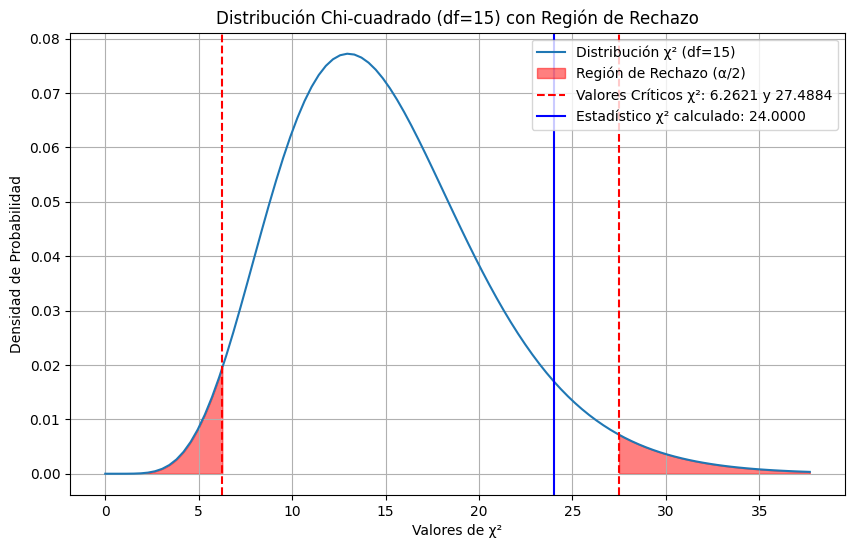

In [62]:
# Generar valores para el eje x de la distribución chi-cuadrado
# El rango debe ir desde valores cercanos a 0 hasta un valor razonable en la cola superior
x = np.linspace(0, stats.chi2.ppf(0.999, df), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución chi-cuadrado
pdf = stats.chi2.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución χ² (df={df})')

# Rellenar la región de rechazo (cola inferior)
x_reject_left = np.linspace(0, chi2_critical_left, 100)
plt.fill_between(x_reject_left, 0, stats.chi2.pdf(x_reject_left, df), color='red', alpha=0.5, label='Región de Rechazo (α/2)')

# Rellenar la región de rechazo (cola superior)
x_reject_right = np.linspace(chi2_critical_right, stats.chi2.ppf(0.999, df), 100)
plt.fill_between(x_reject_right, 0, stats.chi2.pdf(x_reject_right, df), color='red', alpha=0.5)

# Dibujar los valores críticos
plt.axvline(chi2_critical_left, color='red', linestyle='--', label=f'Valores Críticos χ²: {chi2_critical_left:.4f} y {chi2_critical_right:.4f}')
plt.axvline(chi2_critical_right, color='red', linestyle='--')


# Dibujar el estadístico de prueba calculado
plt.axvline(chi2_statistic, color='blue', linestyle='-', label=f'Estadístico χ² calculado: {chi2_statistic:.4f}')

# Añadir título y etiquetas
plt.title(f'Distribución Chi-cuadrado (df={df}) con Región de Rechazo')
plt.xlabel('Valores de χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba $\chi^2$ calculado con los valores críticos, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con los valores críticos:** El estadístico de prueba calculado es {chi2_statistic:.4f}. Los valores críticos para α = 0.05 en una prueba bilateral son {chi2_critical_left:.4f} y {chi2_critical_right:.4f}. Dado que el estadístico de prueba ({chi2_statistic:.4f}) no cae en la región de rechazo (es decir, {chi2_critical_left:.4f} < {chi2_statistic:.4f} < {chi2_critical_right:.4f}), no rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es mayor que α (0.05), no rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, no hay suficiente evidencia estadística para refutar la afirmación de la compañía de telefonía de que la varianza del tiempo de duración de las llamadas es de 2.5 minutos cuadrados. Los datos de la muestra no sugieren que la varianza poblacional difiera significativamente de 2.5.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba Chi-cuadrado tan extremo o más extremo que el observado ({chi2_statistic:.4f}), asumiendo que la hipótesis nula ($\sigma^2 = 2.5$) es verdadera. Un valor p alto (mayor que α) indica que los datos observados son razonablemente probables bajo la hipótesis nula, por lo que no tenemos suficiente evidencia para rechazarla.

## Ejemplo de Prueba de Hipótesis para la Varianza - Segundo Caso

Vamos a realizar otra prueba de hipótesis para la varianza poblacional ($\sigma^2$) utilizando la distribución Chi-cuadrado ($\chi^2$).

**Escenario:** Una máquina embotelladora debe mantener la varianza del llenado en $\sigma^2 = 1,2$ ml$^2$. Se toma una muestra de $n = 20$ botellas y se encuentra $s^2 = 2,0$. ¿Existe evidencia al 1 % de que la varianza es mayor?

### 1. Plantee las hipótesis nula y alternativa.

Dado que la pregunta es si la varianza es **mayor** a 1.2 ml², esta será una prueba de hipótesis unilateral derecha.

*   **Hipótesis Nula (H₀):** La varianza poblacional es igual o menor a 1.2 ($\sigma^2 \le 1.2$).
*   **Hipótesis Alternativa (H₁):** La varianza poblacional es mayor a 1.2 ($\sigma^2 > 1.2$).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.01. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba ($\chi^2$) y su distribución.

Para probar una hipótesis sobre la varianza poblacional, utilizaremos el estadístico de prueba Chi-cuadrado ($\chi^2$). La distribución asociada es la distribución Chi-cuadrado con $n-1$ grados de libertad.

Fórmula del estadístico $\chi^2$:
$$ \chi^2 = \frac{(n-1)s^2}{\sigma_0^2} $$
Donde:
*   $n$ es el tamaño de la muestra.
*   $s^2$ es la varianza muestral.
*   $\sigma_0^2$ es la varianza poblacional hipotetizada bajo H₀.

### 4. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.

Para una prueba unilateral derecha con α = 0.01 y $n - 1 = 20 - 1 = 19$ grados de libertad, necesitamos encontrar el valor crítico $\chi^2$ que deja α = 0.01 en la cola superior de la distribución Chi-cuadrado.

In [63]:
# Parámetros del problema
sigma2_0 = 1.2   # Varianza poblacional hipotetizada (H0)
s2 = 2.0         # Varianza muestral
n = 20          # Tamaño de la muestra
alpha = 0.01    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular el valor crítico chi-cuadrado para una prueba unilateral derecha
chi2_critical = stats.chi2.ppf(1 - alpha, df)


print(f"Grados de libertad (df): {df}")
print(f"Valor crítico χ² (cola superior): {chi2_critical:.4f}")


# La región de rechazo son los valores de χ² calculados que son mayores que chi2_critical.

Grados de libertad (df): 19
Valor crítico χ² (cola superior): 36.1909


### 5. Calcule el estadístico $\chi^2$ y el valor p.

In [64]:
# Calcular el estadístico de prueba chi-cuadrado
chi2_statistic = ((n - 1) * s2) / sigma2_0

# Calcular el valor p (prueba unilateral derecha)
# El p-valor para una prueba unilateral derecha es P(χ² > chi2_statistic)
p_value = 1 - stats.chi2.cdf(chi2_statistic, df)


print(f"Estadístico de prueba χ² calculado: {chi2_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba χ² calculado: 31.6667
Valor p: 0.0341


### 6. Grafique la distribución $\chi^2$, la región de rechazo, los valores críticos y el estadístico calculado.

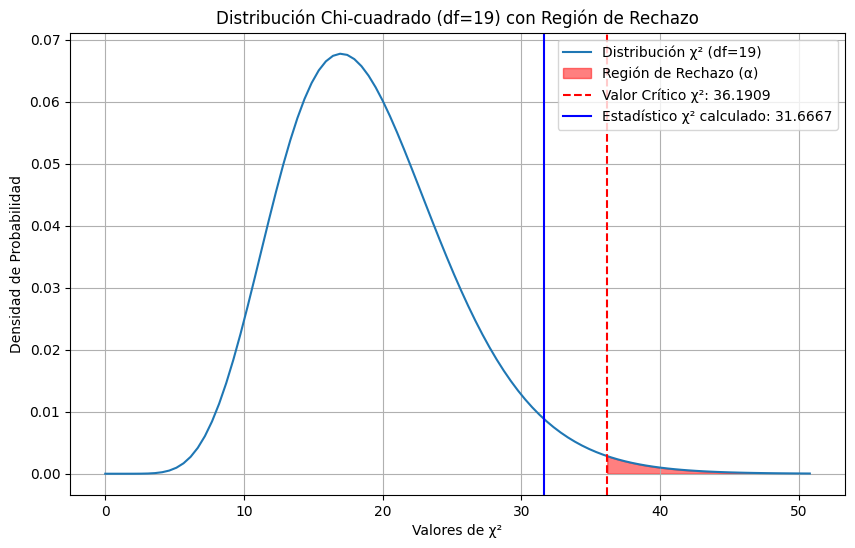

In [65]:
# Generar valores para el eje x de la distribución chi-cuadrado
# El rango debe ir desde valores cercanos a 0 hasta un valor razonable en la cola superior
x = np.linspace(0, stats.chi2.ppf(0.9999, df), 100) # Ajustar rango para alpha=0.01

# Generar la función de densidad de probabilidad (PDF) de la distribución chi-cuadrado
pdf = stats.chi2.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución χ² (df={df})')

# Rellenar la región de rechazo (cola superior)
x_reject_right = np.linspace(chi2_critical, stats.chi2.ppf(0.9999, df), 100) # Ajustar rango
plt.fill_between(x_reject_right, 0, stats.chi2.pdf(x_reject_right, df), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(chi2_critical, color='red', linestyle='--', label=f'Valor Crítico χ²: {chi2_critical:.4f}')


# Dibujar el estadístico de prueba calculado
plt.axvline(chi2_statistic, color='blue', linestyle='-', label=f'Estadístico χ² calculado: {chi2_statistic:.4f}')

# Añadir título y etiquetas
plt.title(f'Distribución Chi-cuadrado (df={df}) con Región de Rechazo')
plt.xlabel('Valores de χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba $\chi^2$ calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {chi2_statistic:.4f}. El valor crítico para α = 0.01 en una prueba unilateral derecha es {chi2_critical:.4f}. Dado que el estadístico de prueba ({chi2_statistic:.4f}) no cae en la región de rechazo (es decir, {chi2_statistic:.4f} < {chi2_critical:.4f}), no rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.01. Dado que el valor p ({p_value:.4f}) es mayor que α (0.01), no rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.01, no hay suficiente evidencia estadística para concluir que la varianza del llenado de las botellas es mayor a 1.2 ml cuadrados. Los datos de la muestra no apoyan la conclusión de que la varianza poblacional ha aumentado.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba Chi-cuadrado tan extremo o más extremo que el observado ({chi2_statistic:.4f}), asumiendo que la hipótesis nula ($\sigma^2 \le 1.2$) es verdadera. Un valor p alto (mayor que α) indica que los datos observados son razonablemente probables bajo la hipótesis nula, por lo que no tenemos suficiente evidencia para rechazarla.

## Ejemplo de Prueba de Hipótesis para la Varianza - Tercer Caso

Vamos a realizar otra prueba de hipótesis para la varianza poblacional ($\sigma^2$) utilizando la distribución Chi-cuadrado ($\chi^2$).

**Escenario:** El control de calidad de una fábrica sostiene que la varianza en el grosor de piezas metálicas es de al menos $\sigma^2 = 0,5$ mm$^2$. Una muestra de $n = 12$ piezas dio una varianza $s^2 = 0,3$. ¿Se puede concluir al 5 % que la varianza poblacional es menor que la garantizada?

### 1. Plantee las hipótesis nula y alternativa.

Dado que se desea concluir si la varianza poblacional es **menor** que la garantizada, esta será una prueba de hipótesis unilateral izquierda.

*   **Hipótesis Nula (H₀):** La varianza poblacional es igual o mayor a 0.5 ($\sigma^2 \ge 0.5$).
*   **Hipótesis Alternativa (H₁):** La varianza poblacional es menor a 0.5 ($\sigma^2 < 0.5$).

### 2. Establezca el nivel de significancia α.

El nivel de significancia dado es α = 0.05. Este es el riesgo máximo que estamos dispuestos a aceptar de rechazar la hipótesis nula cuando es verdadera.

### 3. Identifique el estadístico de prueba ($\chi^2$) y su distribución.

Para probar una hipótesis sobre la varianza poblacional, utilizaremos el estadístico de prueba Chi-cuadrado ($\chi^2$). La distribución asociada es la distribución Chi-cuadrado con $n-1$ grados de libertad.

Fórmula del estadístico $\chi^2$:
$$ \chi^2 = \frac{(n-1)s^2}{\sigma_0^2} $$
Donde:
*   $n$ es el tamaño de la muestra.
*   $s^2$ es la varianza muestral.
*   $\sigma_0^2$ es la varianza poblacional hipotetizada bajo H₀.

### 4. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.

Para una prueba unilateral izquierda con α = 0.05 y $n - 1 = 12 - 1 = 11$ grados de libertad, necesitamos encontrar el valor crítico $\chi^2$ que deja α = 0.05 en la cola inferior de la distribución Chi-cuadrado.

In [66]:
# Parámetros del problema
sigma2_0 = 0.5   # Varianza poblacional hipotetizada (H0)
s2 = 0.3         # Varianza muestral
n = 12          # Tamaño de la muestra
alpha = 0.05    # Nivel de significancia
df = n - 1      # Grados de libertad

# Calcular el valor crítico chi-cuadrado para una prueba unilateral izquierda
chi2_critical = stats.chi2.ppf(alpha, df)


print(f"Grados de libertad (df): {df}")
print(f"Valor crítico χ² (cola inferior): {chi2_critical:.4f}")


# La región de rechazo son los valores de χ² calculados que son menores que chi2_critical.

Grados de libertad (df): 11
Valor crítico χ² (cola inferior): 4.5748


### 5. Calcule el estadístico $\chi^2$ y el valor p.

In [67]:
# Calcular el estadístico de prueba chi-cuadrado
chi2_statistic = ((n - 1) * s2) / sigma2_0

# Calcular el valor p (prueba unilateral izquierda)
# El p-valor para una prueba unilateral izquierda es P(χ² < chi2_statistic)
p_value = stats.chi2.cdf(chi2_statistic, df)


print(f"Estadístico de prueba χ² calculado: {chi2_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico de prueba χ² calculado: 6.6000
Valor p: 0.1695


### 6. Grafique la distribución $\chi^2$, la región de rechazo, los valores críticos y el estadístico calculado.

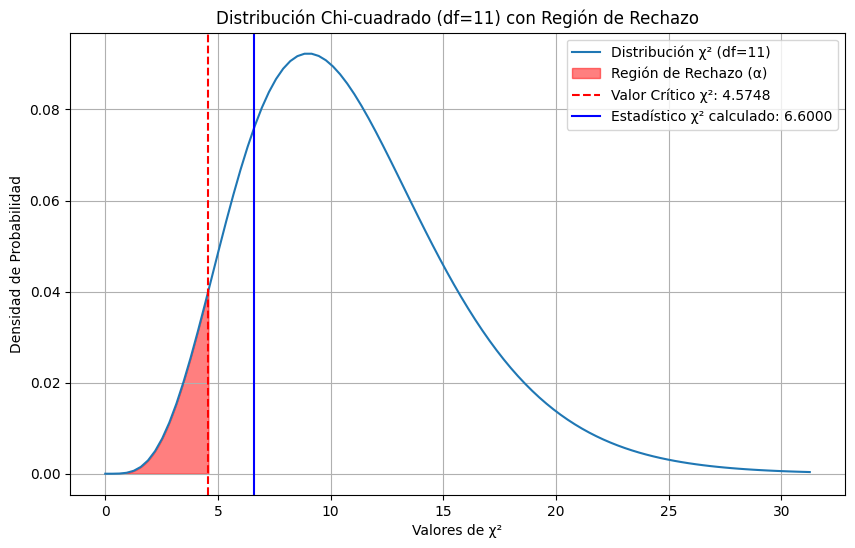

In [68]:
# Generar valores para el eje x de la distribución chi-cuadrado
# El rango debe ir desde valores cercanos a 0 hasta un valor razonable en la cola superior
x = np.linspace(0, stats.chi2.ppf(0.999, df), 100)

# Generar la función de densidad de probabilidad (PDF) de la distribución chi-cuadrado
pdf = stats.chi2.pdf(x, df)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Distribución χ² (df={df})')

# Rellenar la región de rechazo (cola inferior)
x_reject_left = np.linspace(0, chi2_critical, 100)
plt.fill_between(x_reject_left, 0, stats.chi2.pdf(x_reject_left, df), color='red', alpha=0.5, label='Región de Rechazo (α)')

# Dibujar el valor crítico
plt.axvline(chi2_critical, color='red', linestyle='--', label=f'Valor Crítico χ²: {chi2_critical:.4f}')


# Dibujar el estadístico de prueba calculado
plt.axvline(chi2_statistic, color='blue', linestyle='-', label=f'Estadístico χ² calculado: {chi2_statistic:.4f}')

# Añadir título y etiquetas
plt.title(f'Distribución Chi-cuadrado (df={df}) con Región de Rechazo')
plt.xlabel('Valores de χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### 7. Tome una decisión estadística y concluya en términos prácticos.

Para tomar una decisión, comparamos el estadístico de prueba $\chi^2$ calculado con el valor crítico, o alternativamente, comparamos el valor p con el nivel de significancia α.

*   **Comparación con el valor crítico:** El estadístico de prueba calculado es {chi2_statistic:.4f}. El valor crítico para α = 0.05 en una prueba unilateral izquierda es {chi2_critical:.4f}. Dado que el estadístico de prueba ({chi2_statistic:.4f}) cae en la región de rechazo (es decir, {chi2_statistic:.4f} < {chi2_critical:.4f}), rechazamos la hipótesis nula.

*   **Comparación con el valor p:** El valor p calculado es {p_value:.4f}. El nivel de significancia α es 0.05. Dado que el valor p ({p_value:.4f}) es menor que α (0.05), rechazamos la hipótesis nula.

**Conclusión:**

Con un nivel de significancia de 0.05, hay suficiente evidencia estadística para concluir que la varianza poblacional en el grosor de las piezas metálicas es menor que la garantizada de 0.5 mm cuadrados.

**Significado del valor p:**

El valor p ({p_value:.4f}) representa la probabilidad de obtener un estadístico de prueba Chi-cuadrado tan extremo o más extremo que el observado ({chi2_statistic:.4f}), asumiendo que la hipótesis nula ($\sigma^2 \ge 0.5$) es verdadera. Un valor p bajo (menor que α) indica que los datos observados son poco probables bajo la hipótesis nula, lo que nos lleva a rechazarla.